In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from warnings import simplefilter   # ignoring warnings
simplefilter(action='ignore', category=Warning)
import numpy as np

In [281]:
df = pd.read_csv(r"Churn_Modelling.csv")
df.shape

(10000, 14)

In [282]:
#display all columns
pd.set_option('display.max_columns', None)
df.head()
# Tenure :Number of years for which the customer has been with the bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Cleaning

In [285]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [286]:
df.duplicated().sum()

0

In [287]:
# drop useless columns
df.drop(['RowNumber'],axis=1,inplace=True)

In [288]:
print("min", df.CreditScore.min())
print("max",df.CreditScore.max())

min 350
max 850


<div style="font-family: Arial, sans-serif; line-height: 1.8; padding: 10px; border: 1px solid #ddd; border-radius: 8px;box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  <h1 style="text-align: center; color: #4CAF50;">Credit Score Ranges</h1>
  
  <p>
    <strong><span style="color: #4CAF50; font-size: 18px;">🌟 Excellent Credit (720-850):</span></strong>  
    Indicates a strong credit history, with <b>on-time payments</b>, <b>low debt</b>, and a <b>long credit history</b>.
  </p>
  
  <p>
    <strong><span style="color: #2196F3; font-size: 18px;">✅ Very Good Credit (700-719):</span></strong>  
    Represents a good credit history, with <b>minor flaws</b>, such as occasional late payments or higher debt levels.
  </p>
  
  <p>
    <strong><span style="color: #3F51B5; font-size: 18px;">🔵 Good Credit (660-699):</span></strong>  
    Indicates a solid credit history, with <b>some minor flaws</b>, such as higher debt levels or occasional late payments.
  </p>
  
  <p>
    <strong><span style="color: #FF9800; font-size: 18px;">🟠 Fair Credit (620-659):</span></strong>  
    Represents a credit history with <b>some flaws</b>, such as missed payments, higher debt levels, or a shorter credit history.  
    <i>Lenders consider borrowers with fair credit as high-risk, offering higher interest rates and stricter loan terms.</i>
  </p>
  
  <p>
    <strong><span style="color: #F44336; font-size: 18px;">🔴 Poor Credit (Below 620):</span></strong>  
    Indicates a credit history with <b>significant flaws</b>, such as frequent late payments, high debt levels, or public records (e.g., bankruptcies).
  </p>
</div>

In [290]:
def score_to_category(score):
    if score < 620:
        return 'Poor'
    elif 620 <= score < 659:
        return 'Fair'
    elif 660 <= score < 699:
        return 'Good'
    elif 700 <= score < 719:
        return 'Very Good'
    else:
        return 'Excellent'

# Apply the function to create a new column
df['CreditScoreCategory'] = df['CreditScore'].apply(score_to_category)

df.CreditScoreCategory.value_counts()

CreditScoreCategory
Poor         3744
Excellent    2541
Fair         1517
Good         1513
Very Good     685
Name: count, dtype: int64

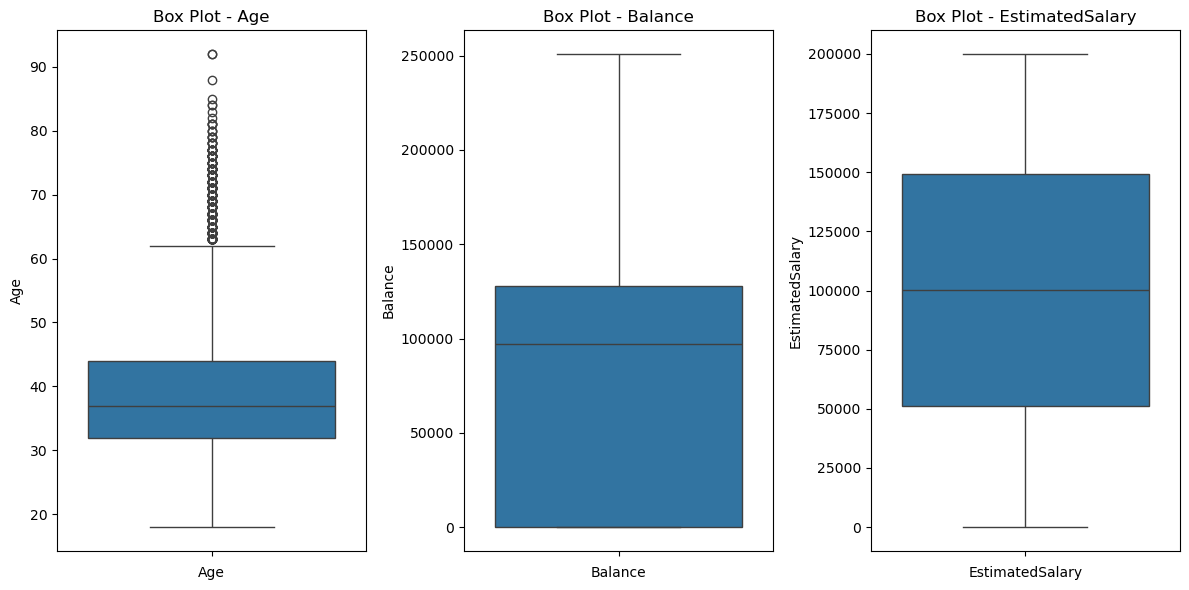

In [291]:
# check for outliers
numerical_columns = ['Age','Balance','EstimatedSalary']

# Plot box plots for all numerical columns
plt.figure(figsize=(12, 6))  # Adjust figure size to fit all plots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)  # Arrange plots in a single row
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot - {col}')
    plt.xlabel(col)

plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()

Around 400 outliers were identified in the dataset. Since this is not a small number, we decided to retain the outliers and address them during the data processing phase to maintain data integrity.

# EDA

In [294]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exited Column

In [296]:
churn = df['Exited'].value_counts().reset_index()
churn

,Exited,count
0,0,7963
1,1,2037


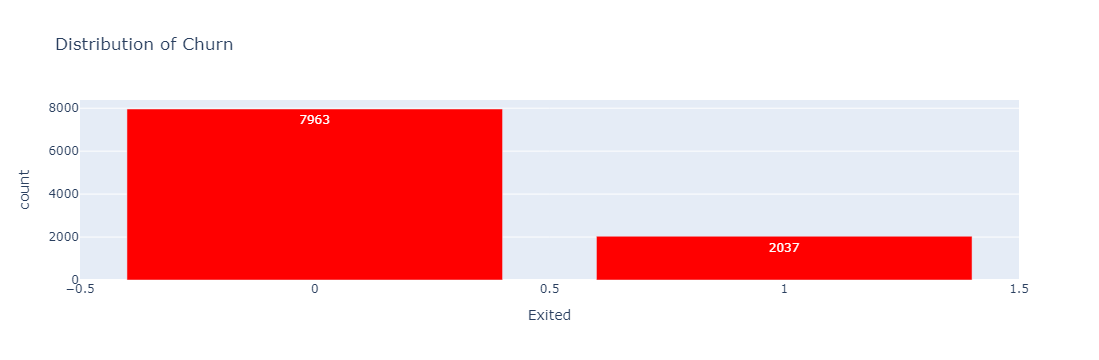

In [297]:
fig = px.bar(churn,
             x='Exited',
             y='count',
             title='Distribution of Churn',
             text_auto=True,
             width=600,
             color_discrete_sequence=['red']
             )
fig.show()
# Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

In [298]:
GenderCount=df.Gender.value_counts().reset_index()
GenderCount

,Gender,count
0,Male,5457
1,Female,4543


In [299]:
GeographyCount = df.Geography.value_counts().reset_index()
GeographyCount

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


In [300]:
NumOfProductsCounts=df['NumOfProducts'].value_counts().reset_index()
NumOfProductsCounts

,NumOfProducts,count
0,1,5084
1,2,4590
2,3,266
3,4,60


In [301]:
HasCrCardCounts=df['HasCrCard'].value_counts().reset_index()
HasCrCardCounts

,HasCrCard,count
0,1,7055
1,0,2945


In [302]:
IsActiveMemberCounts=df['IsActiveMember'].value_counts().reset_index()
IsActiveMemberCounts

,IsActiveMember,count
0,1,5151
1,0,4849


In [303]:
CreditScoreCategoryCount=df.CreditScoreCategory.value_counts().reset_index()
CreditScoreCategoryCount

,CreditScoreCategory,count
0,Poor,3744
1,Excellent,2541
2,Fair,1517
3,Good,1513
4,Very Good,685


### Visual Representation for all categorical features

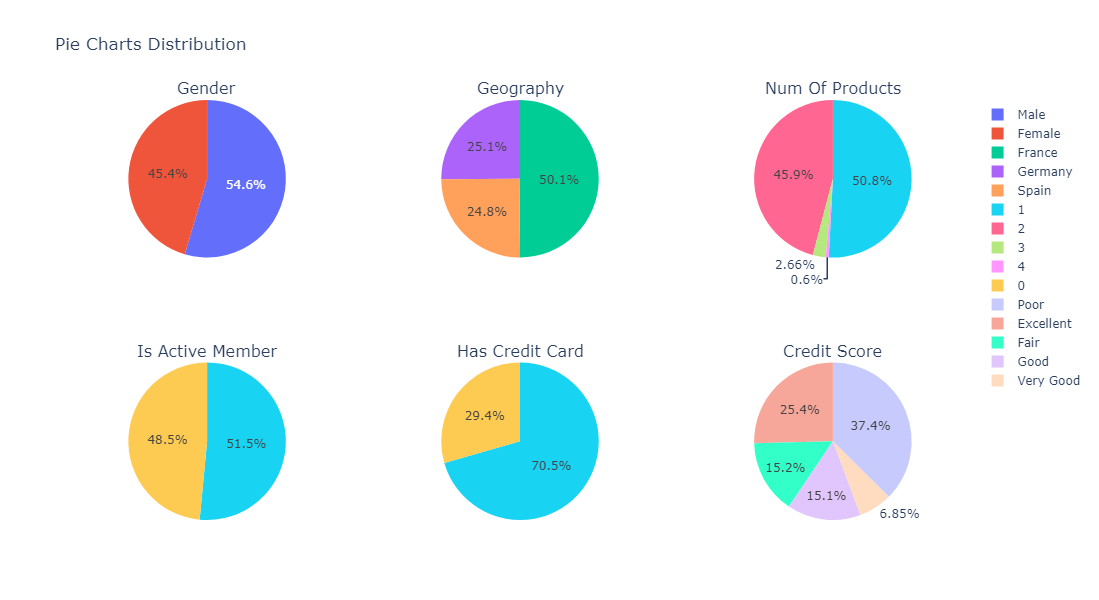

In [305]:
from plotly.subplots import make_subplots

list_of_data = [GenderCount, GeographyCount, NumOfProductsCounts, IsActiveMemberCounts, HasCrCardCounts,CreditScoreCategoryCount]
titles = ["Gender", 'Geography', "Num Of Products", "Is Active Member", "Has Credit Card","Credit Score"]


fig = make_subplots(
    rows=2, cols=3, 
    subplot_titles=titles, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}], 
           [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
)


# Add each pie chart to the subplot
for i, data in enumerate(list_of_data):
    row = i // 3 + 1  # Dividing by 3 for rows in a 2x3 layout
    col = i % 3 + 1   # Modulo by 3 to handle columns
    fig.add_trace(
        px.pie(data, names=data.columns[0], values='count' ).data[0],
        row=row, col=col
    )

# Update layout
fig.update_layout(height=600, width=900, title_text="Pie Charts Distribution")
fig.show()


<div style="border: 2px solid #636EFA; padding: 20px; border-radius: 10px; background-color: #F9F9F9;">
    <h2 style="text-align: center; color: #636EFA;">Key Insights</h2>
    <ul style="font-size: 16px; line-height: 1.8;">
        <li><b> Gender :</b>Majority of customers are males</li>
        <li><b>Geography:</b> Most customers from France</li>
        <li><b>Number of products :</b>Most customers have 1 or 2 services</li>
        <li>Most customers are Active and has credit card</li>
        <li><b>Credit Score :</b> Many customers fall within the spectrum between poor and excellent credit history.</li>
    </ul>
</div>

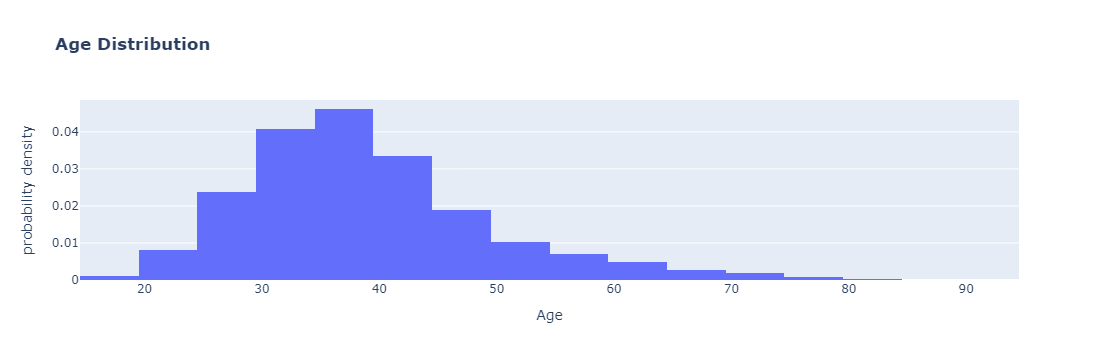

In [307]:
# Explore Age column
fig = px.histogram(df,
                    x="Age", 
                    nbins=20, 
                    title='<b>Age Distribution<b>',
                    histnorm='probability density')
fig.show()

In [308]:
TenureCount=df.Tenure.value_counts().reset_index()
TenureCount
# some people stay from 1 to 9 and few people stay 0 and 10 years

,Tenure,count
0,2,1048
1,1,1035
2,7,1028
3,8,1025
4,5,1012
5,3,1009
6,4,989
7,9,984
8,6,967
9,10,490


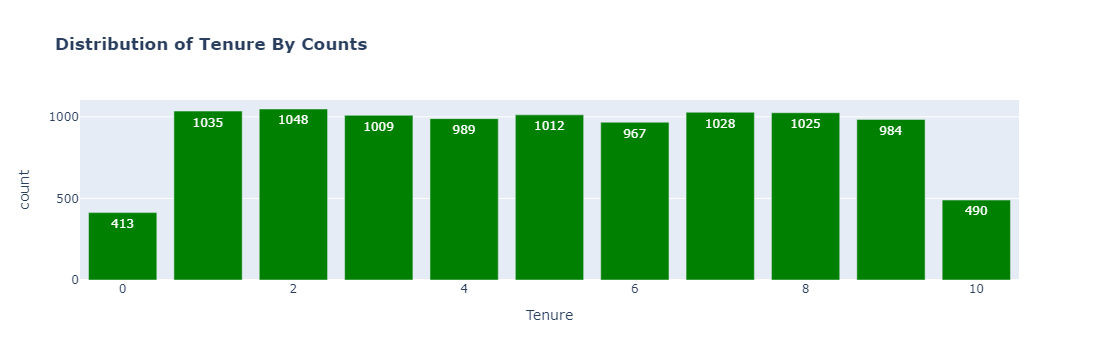

In [309]:
fig = px.bar(TenureCount,
             x='Tenure',
             y='count',
             title='<b>Distribution of Tenure By Counts<b>',
             text_auto=True,
             width=800,
             color_discrete_sequence=['green']
             )
fig.show()
# The most common tenure is 2 year 

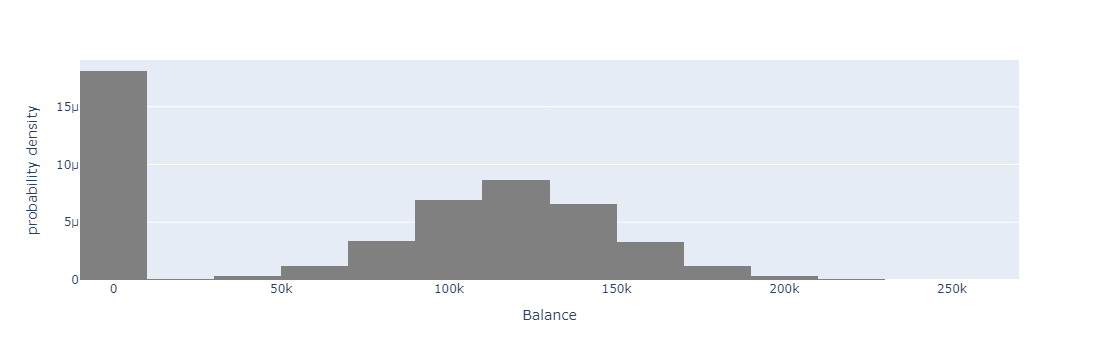

In [310]:
#Explore balance column
fig = px.histogram(df,
                    x="Balance", 
                    nbins=20, 
                    histnorm='probability density',
                    color_discrete_sequence=['grey'])
fig.show()
# It looks that most balances are between 0 and 10K

In [311]:
df['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

<li>Approximately 3,600 rows have a zero balance, despite most of these customers being active members who typically use 1 or 2 products.</li>
<li>This observation suggests that customers with zero balances might hold other financial instruments, such as investment certificates, rather than maintaining liquid cash in their accounts. However, machine learning models might not interpret this nuance effectively.</li>
<li>To improve model accuracy, we decided to convert all balance values greater than zero to 1, treating the column as categorical (0 or 1) to indicate whether or not a customer has a positive balance.</li>


In [313]:
df['Balance']=(df['Balance'] > 0).astype(int)

In [314]:
df['Balance'].value_counts()

Balance
1    6383
0    3617
Name: count, dtype: int64

### Relation between columns and target

#### 1- categorical columns

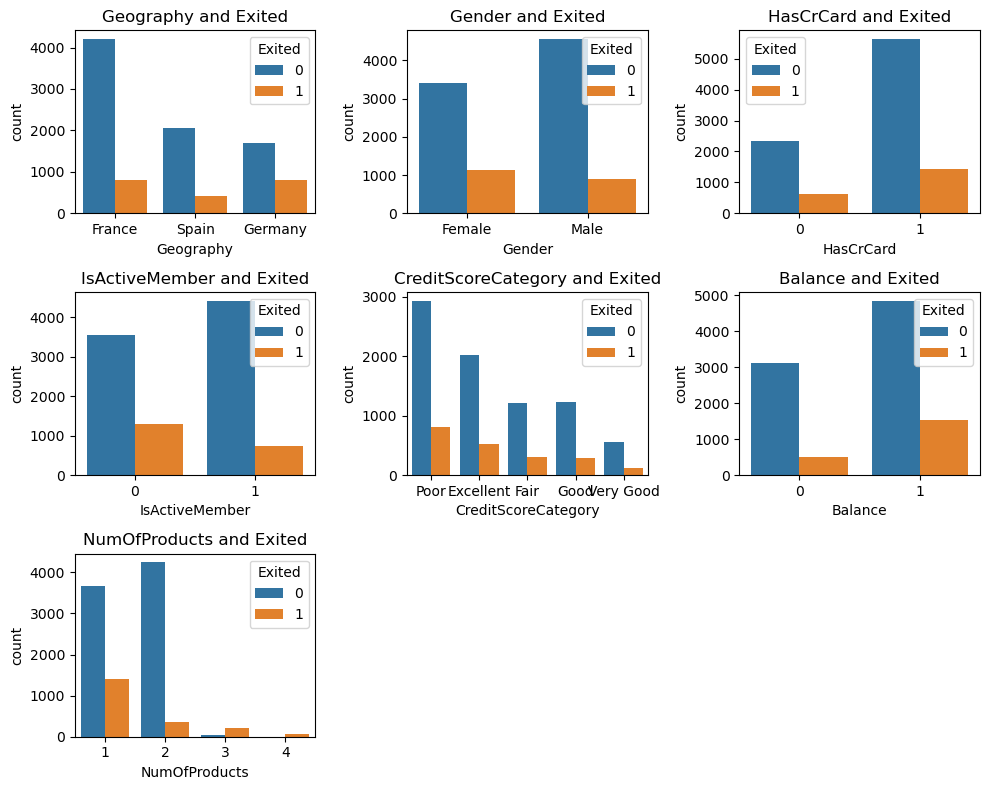

In [317]:
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember','CreditScoreCategory','Balance','NumOfProducts']

plt.figure(figsize=(10, 8))
for i,col in enumerate(categorical_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'{col} and Exited')
    plt.tight_layout()
plt.show()

<li>Customers with a balance equal to 1 those with a positive balance are more likely to retain their accounts.</li>
<li>Active members are more likely to remain with the bank compared to inactive members. </li>
<li>Customers from Germany are more likely to exit the bank compared to those from other countries.</li>
<li>Female customers are more likely to exit the bank than male customers.</li>
<li>Customers with 1 or 2 products are more likely to retain their accounts, while those with 3 or 4 products are less common and may have different behavior patterns.</li>


#### 2- Numerical Columns

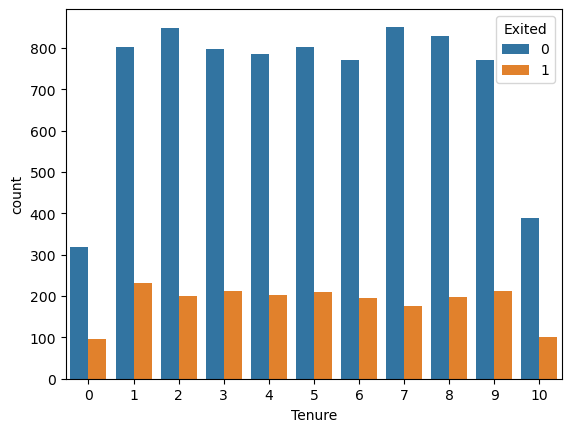

In [320]:
sns.countplot(x="Tenure",data=df,hue="Exited")
plt.show()

In [321]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [322]:
Q1 = df['NumOfProducts'].quantile(0.25)
Q3 = df['NumOfProducts'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop outliers
df = df[(df['NumOfProducts'] >= lower_bound) & (df['NumOfProducts'] <= upper_bound)]
df.shape

(9940, 14)

In [323]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
Name: count, dtype: int64

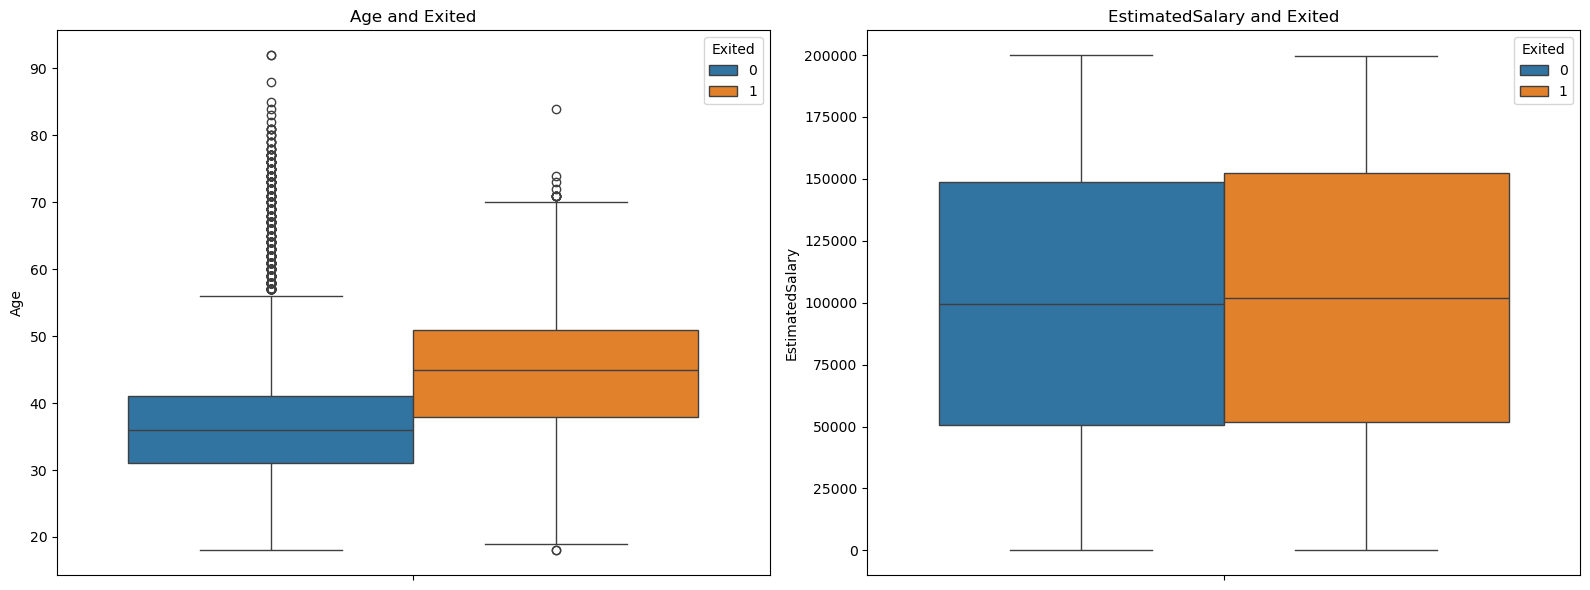

In [324]:
numerical_columns = [ 'Age', 'EstimatedSalary']
plt.figure(figsize=(16, 6))
for i,col in enumerate(numerical_columns):
    plt.subplot(1,2,i+1)
    sns.boxplot(y=col, hue='Exited', data=df)
    plt.title(f'{col} and Exited')
    plt.tight_layout()
plt.show()

it looks that estimatedSalary column doesn't afftect the churn

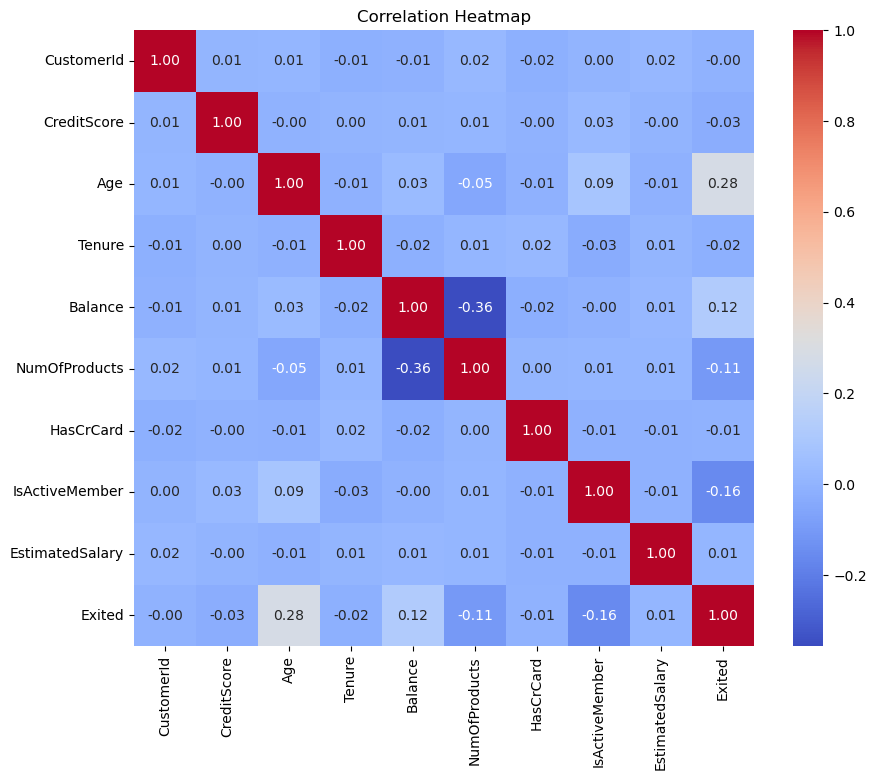

In [359]:
numeric_df = df.select_dtypes(include=['float64', 'int64','int32'],)
plt.figure(figsize=(10, 8))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Age and balance columns have highest correlation

# Data Preprocessing

In [121]:
# Replace male with 0 and female with 1
df['Gender']=df.Gender.replace("Male",0).replace("Female",1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCategory
0,15634602,Hargrave,619,France,1,42,2,0,1,1,1,101348.88,1,Poor
1,15647311,Hill,608,Spain,1,41,1,1,1,0,1,112542.58,0,Poor
2,15619304,Onio,502,France,1,42,8,1,3,1,0,113931.57,1,Poor
3,15701354,Boni,699,France,1,39,1,0,2,0,0,93826.63,0,Excellent
4,15737888,Mitchell,850,Spain,1,43,2,1,1,1,1,79084.10,0,Excellent


In [122]:
#apply one hot encoding
df= pd.get_dummies(df, columns=['Geography',"NumOfProducts"], drop_first=False)
df

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCategory,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3
0,15634602,Hargrave,619,1,42,2,0,1,1,101348.88,1,Poor,True,False,False,True,False,False
1,15647311,Hill,608,1,41,1,1,0,1,112542.58,0,Poor,False,False,True,True,False,False
2,15619304,Onio,502,1,42,8,1,1,0,113931.57,1,Poor,True,False,False,False,False,True
3,15701354,Boni,699,1,39,1,0,0,0,93826.63,0,Excellent,True,False,False,False,True,False
4,15737888,Mitchell,850,1,43,2,1,1,1,79084.10,0,Excellent,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,0,39,5,0,1,0,96270.64,0,Excellent,True,False,False,False,True,False
9996,15569892,Johnstone,516,0,35,10,1,1,1,101699.77,0,Poor,True,False,False,True,False,False
9997,15584532,Liu,709,1,36,7,0,0,1,42085.58,1,Very Good,True,False,False,True,False,False
9998,15682355,Sabbatini,772,0,42,3,1,1,0,92888.52,1,Excellent,False,True,False,False,True,False


In [123]:
# data we need for modeling
data = df.iloc[:, list(range(3, 10)) +list(range(11, 18)) + [10]]
data

,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,CreditScoreCategory,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,Exited
0,1,42,2,0,1,1,101348.88,Poor,True,False,False,True,False,False,1
1,1,41,1,1,0,1,112542.58,Poor,False,False,True,True,False,False,0
2,1,42,8,1,1,0,113931.57,Poor,True,False,False,False,False,True,1
3,1,39,1,0,0,0,93826.63,Excellent,True,False,False,False,True,False,0
4,1,43,2,1,1,1,79084.10,Excellent,False,False,True,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,39,5,0,1,0,96270.64,Excellent,True,False,False,False,True,False,0
9996,0,35,10,1,1,1,101699.77,Poor,True,False,False,True,False,False,0
9997,1,36,7,0,0,1,42085.58,Very Good,True,False,False,True,False,False,1
9998,0,42,3,1,1,0,92888.52,Excellent,False,True,False,False,True,False,1


In [124]:
data['Geography_Germany']=data['Geography_Germany'].replace(False,0).replace(True,1)
data['Geography_Spain']=data['Geography_Spain'].replace(False,0).replace(True,1)
data['Geography_France']=data['Geography_France'].replace(False,0).replace(True,1)
data['NumOfProducts_1']=data['NumOfProducts_1'].replace(False,0).replace(True,1)
data['NumOfProducts_2']=data['NumOfProducts_2'].replace(False,0).replace(True,1)
data['NumOfProducts_3']=data['NumOfProducts_3'].replace(False,0).replace(True,1)
# label encoding
data['CreditScoreCategory']=data['CreditScoreCategory'].replace('Poor',1).replace('Fair',2).replace('Good',3).replace('Very Good',4).replace('Excellent',5)
data

,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,CreditScoreCategory,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,Exited
0,1,42,2,0,1,1,101348.88,1,1,0,0,1,0,0,1
1,1,41,1,1,0,1,112542.58,1,0,0,1,1,0,0,0
2,1,42,8,1,1,0,113931.57,1,1,0,0,0,0,1,1
3,1,39,1,0,0,0,93826.63,5,1,0,0,0,1,0,0
4,1,43,2,1,1,1,79084.10,5,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,39,5,0,1,0,96270.64,5,1,0,0,0,1,0,0
9996,0,35,10,1,1,1,101699.77,1,1,0,0,1,0,0,0
9997,1,36,7,0,0,1,42085.58,4,1,0,0,1,0,0,1
9998,0,42,3,1,1,0,92888.52,5,0,1,0,0,1,0,1


In [125]:
x = data.drop(columns=['Exited'])
y = data['Exited'] #target

In [126]:
# split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,CreditScoreCategory,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3
717,1,42,5,0,0,0,24210.56,4,0,0,1,0,1,0
811,0,65,7,1,0,1,190419.81,3,0,0,1,0,1,0
3223,0,39,2,1,0,0,79503.05,5,0,0,1,1,0,0
7577,0,43,3,1,1,1,150048.37,1,0,1,0,1,0,0
6475,0,41,5,1,0,0,88729.22,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770,0,51,8,1,1,0,171587.90,2,1,0,0,1,0,0
5224,0,43,3,0,1,0,72051.44,5,0,0,1,1,0,0
5425,1,44,8,1,0,0,148727.42,2,0,1,0,0,1,0
862,0,41,7,1,1,1,116704.25,5,1,0,0,1,0,0


In [127]:
x_train_frame=x_train

In [128]:
#less sensitive to outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train

array([[ 1.        ,  0.41666667,  0.        , ..., -1.        ,
         1.        ,  0.        ],
       [ 0.        ,  2.33333333,  0.4       , ..., -1.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.16666667, -0.6       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.58333333,  0.6       , ..., -1.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.33333333,  0.4       , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.08333333, -0.2       , ...,  0.        ,
         0.        ,  0.        ]])

In [129]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score, recall_score ,f1_score,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

<i class="fas fa-tree" style="color:green;font-size:30px;"></i> **Decision Tree**

In [131]:
tree = DecisionTreeClassifier(max_depth=3,random_state=42)
tree.fit(x_train,y_train)
y_hat=tree.predict(x_test)

<h3>Evaluate the model</h3>

In [133]:
def compute_metrics(y_test,y_hat):
    print("Accuracy of the Model is =>",round(accuracy_score(y_test,y_hat)*100,2))
    print("F1 Score of the Model is =>",round(f1_score(y_test,y_hat)*100,2))
    print("Recall Score of the Model is =>",round(recall_score(y_test,y_hat)*100,2))
    print("Precision Score of the Model is =>",round(precision_score(y_test,y_hat)*100,2))

In [134]:
y_pred_train = tree.predict(x_train)
compute_metrics(y_train,y_pred_train)

Accuracy of the Model is => 85.05
F1 Score of the Model is => 47.83
Recall Score of the Model is => 34.58
Precision Score of the Model is => 77.52


In [135]:
compute_metrics(y_test,y_hat)

Accuracy of the Model is => 84.26
F1 Score of the Model is => 47.39
Recall Score of the Model is => 35.16
Precision Score of the Model is => 72.68


 """
# **Model Metrics Analysis**

## **Training Metrics**
- The low F1 score suggests improvements to balance between recall and precision scores
- low recall score suggests that the model ability to identify true churn cases is minimal
-----------------------------------------------------------------------------------------------------------------------------------------------------------

## **Test Metrics**
- **Accuracy:** `84.26%`  
   - Slightly less than the training accuracy.
- **Recall:** `35.16`  
   - Recall is small, indicating that the model is poor in identifying positive cases.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

## **Key Observations**
2. **Recall vs. Precision Tradeoff:**  
   - The model does better at predicting positive cases (higher precision) on the test set but worse at recall.

3. **Moderate F1 Score Stability:**  
   - Both test and train F1 scores is low (47), indicating the need for improvement in balancing recall and precision.



<h2> Check class impalancing</h2>

In [138]:
y.value_counts().to_frame()

,count
Exited,
0,7963
1,1977


In [139]:
y_train.value_counts().to_frame()

,count
Exited,
0,6376
1,1576


In [140]:
smt = SMOTE(random_state=42)
x_train,y_train = smt.fit_resample(x_train,y_train)
x_test,y_test = smt.fit_resample(x_test,y_test)
print(x_train.shape ,y_train.shape)

(12752, 14) (12752,)


In [141]:
tree.fit(x_train,y_train)
y_hat=tree.predict(x_test)
compute_metrics(y_test,y_hat)

Accuracy of the Model is => 75.9
F1 Score of the Model is => 74.86
Recall Score of the Model is => 71.77
Precision Score of the Model is => 78.23


In [142]:
selector = RFE(tree, n_features_to_select=11)  
selector = selector.fit(x_train, y_train)

# Get the selected features
selected_features = x_train_frame.columns[selector.support_]
print(f"Most Important Features: {selected_features}")

Most Important Features: Index(['Age', 'Balance', 'IsActiveMember', 'EstimatedSalary',
       'CreditScoreCategory', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'NumOfProducts_1', 'NumOfProducts_2',
       'NumOfProducts_3'],
      dtype='object')


In [143]:
imp_df = pd.DataFrame({"Feature Name":x_train_frame.columns,
                       "Importance":tree.feature_importances_})

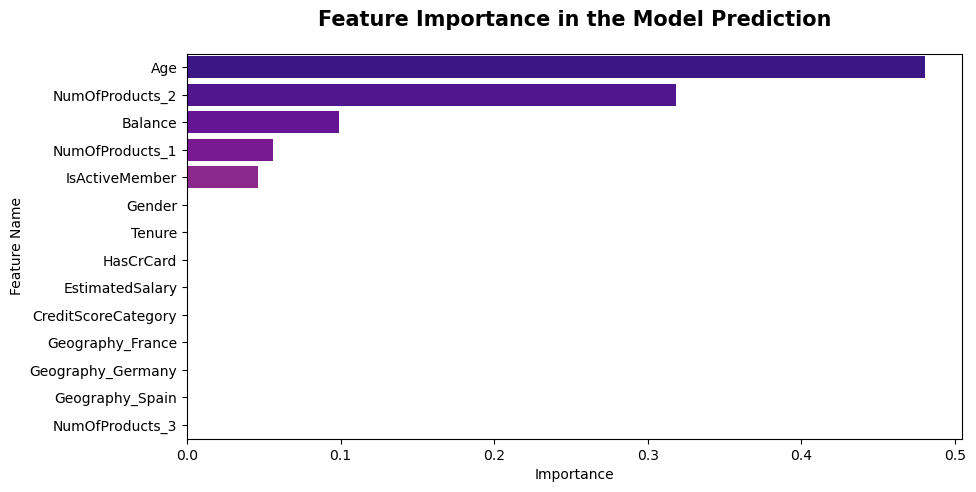

In [144]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=15, pad=20)
plt.yticks(size=10)
plt.show()

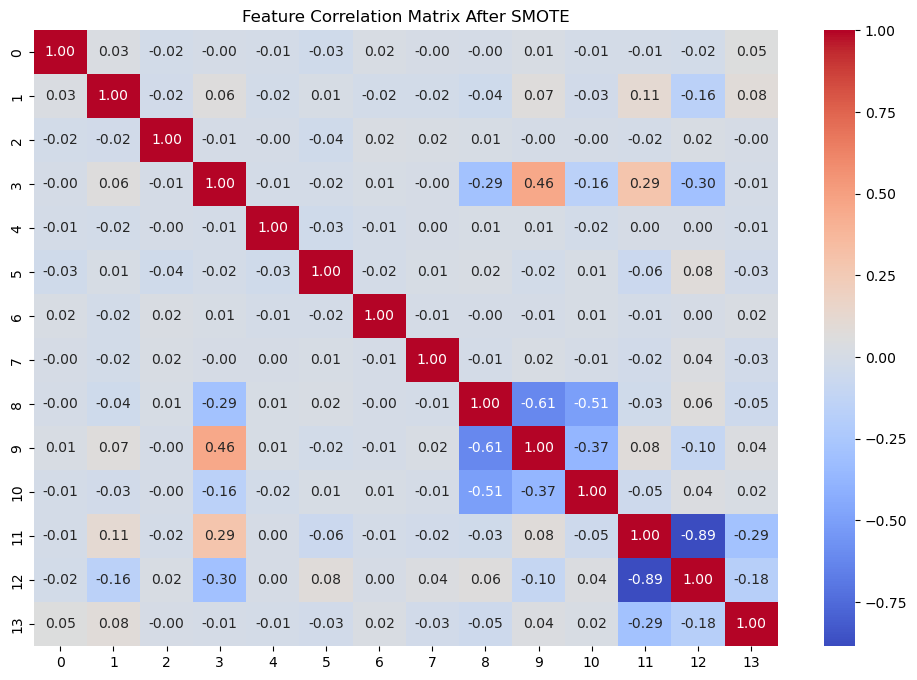

Highly correlated feature pairs:
 0   0     1.000000
1   1     1.000000
12  12    1.000000
11  11    1.000000
10  10    1.000000
9   9     1.000000
8   8     1.000000
7   7     1.000000
6   6     1.000000
5   5     1.000000
4   4     1.000000
3   3     1.000000
2   2     1.000000
13  13    1.000000
11  12    0.885396
12  11    0.885396
dtype: float64


In [145]:
# Correlation matrix
correlation_matrix = pd.DataFrame(x_train).corr()

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix After SMOTE')
plt.show()

# Identify highly correlated features
threshold = 0.85  
high_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr > threshold]
print("Highly correlated feature pairs:\n", high_corr)


In [146]:
# Select the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify features to drop
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]
print("Features to Drop:", to_drop)

# Drop the features from the dataset
x_train_reduced = pd.DataFrame(x_train).drop(columns=to_drop)
x_test_reduced =  pd.DataFrame(x_test).drop(columns=to_drop)

print("Reduced Dataset Shape:", x_train_reduced.shape)

Features to Drop: [12]
Reduced Dataset Shape: (12752, 13)


In [147]:
tree.fit(x_train_reduced, y_train)
y_pred = tree.predict(x_test_reduced)
compute_metrics(y_test,y_pred)

Accuracy of the Model is => 75.39
F1 Score of the Model is => 76.9
Recall Score of the Model is => 81.92
Precision Score of the Model is => 72.46



## **Model Metrics After Applying SMOTE and RFE **
  
## **Metric Comparison**

| Metric           | Before SMOTE & RFE | After SMOTE & RFE |
|-------------------|---------------------|-------------------|
| **Accuracy**      | 84.26%              | 75.39%            |
| **F1 Score**      | 47.39%              | 76.9%             |
| **Recall**        | 35.16%              | 81.92%            |
| **Precision**     | 72.68%              | 72.46%            |

-----------------------------------------------------------------------------------------------------------------------------------------------------------

## **Key Insights**
1. **Significant Improvement** in **Recall**:
   - **Recall** increased significantly, indicating better detection of churners.
2. **Balanced F1 Score**:
   - The model is maintaining a good balance between precision and recall.
   - AfterBalancing the data the accuracy decreased indicating the bias to the majority class at first

<h2>Parameter Tunning with gridsearchCV</h2>

In [150]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"]
             }
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_reduced,y_train)


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]})

In [151]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [152]:
results = grid_search.cv_results_

# for mean_score, params in zip(results['mean_test_score'], results['params']):
#     print(f"Accuracy: {mean_score:.4f}, Params: {params}")

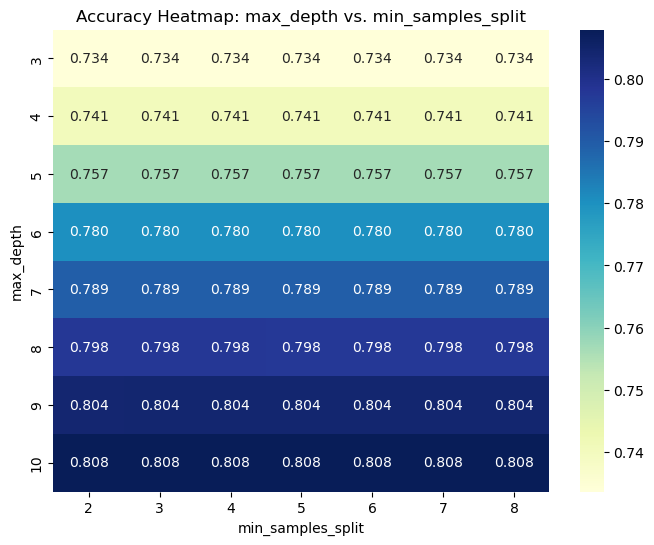

In [153]:
results_df = pd.DataFrame(results['params'])
results_df['mean_test_score'] = results['mean_test_score']

# Create a heatmap for max_depth vs. min_samples_split
heatmap_data = results_df.pivot_table(
    values='mean_test_score',
    index='max_depth',
    columns='min_samples_split'
)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Accuracy Heatmap: max_depth vs. min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()


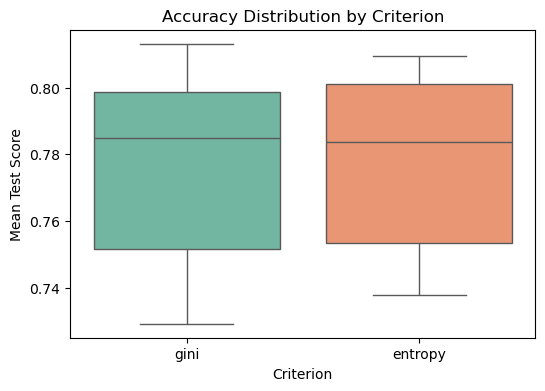

In [154]:
# Create a boxplot for criterion vs. accuracy
plt.figure(figsize=(6, 4))
sns.boxplot(data=results_df, x='criterion', y='mean_test_score', palette="Set2")
plt.title("Accuracy Distribution by Criterion")
plt.xlabel("Criterion")
plt.ylabel("Mean Test Score")
plt.show()

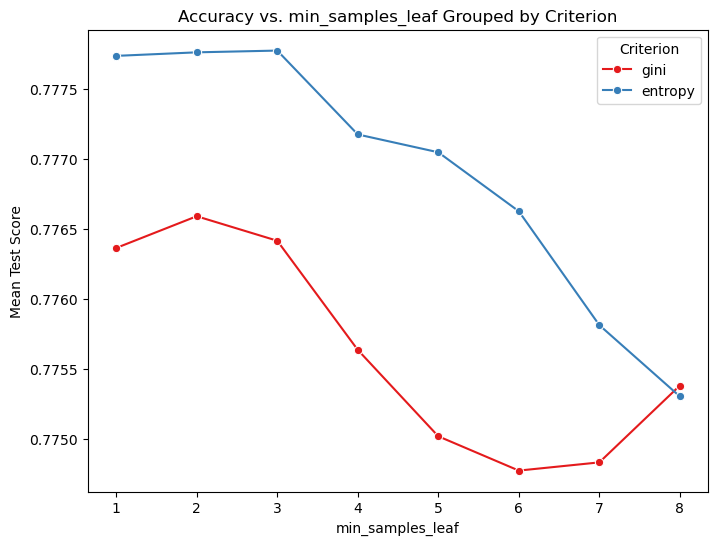

In [155]:
# Line plot for min_samples_leaf impact grouped by criterion
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='min_samples_leaf', y='mean_test_score', hue='criterion', marker='o', palette="Set1",ci=None)
plt.title("Accuracy vs. min_samples_leaf Grouped by Criterion")
plt.xlabel("min_samples_leaf")
plt.ylabel("Mean Test Score")
plt.legend(title="Criterion")
plt.show()

In [156]:
tree = DecisionTreeClassifier(**best_parameters,random_state=42)
tree.fit(x_train_reduced, y_train)
y_test_pred = tree.predict(x_test_reduced)
compute_metrics(y_test,y_test_pred)

Accuracy of the Model is => 79.62
F1 Score of the Model is => 80.45
Recall Score of the Model is => 83.87
Precision Score of the Model is => 77.29


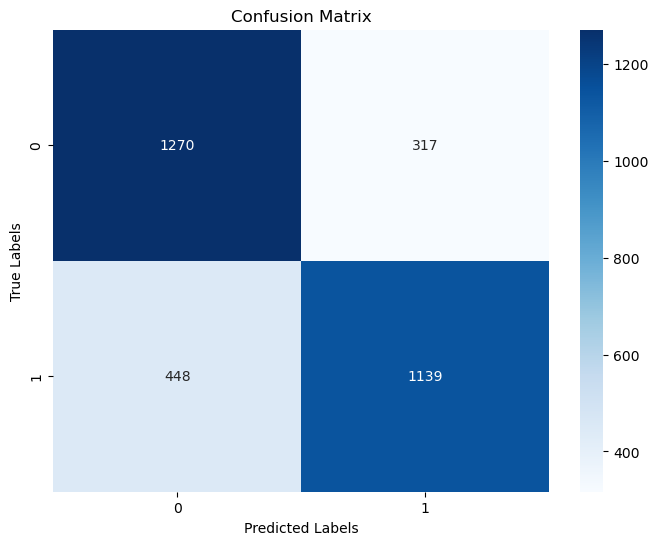

In [157]:
cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=tree.classes_, yticklabels=tree.classes_)

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# **Model Metrics After Applying Grid Search**

## **Metric Comparison**

| Metric            | Before Grid Search  | After Grid Search |
|-------------------|---------------------|-------------------|
| **Accuracy**      | 75.39%              | 79.62%            |
| **F1 Score**      | 76.9%               | 80.45%            |
| **Recall**        | 81.92%              | 83.87%            |
| **Precision**     | 72.46%              | 77.29%            |

-----------------------------------------------------------------------------------------------------------------------------------------------------------

## **Key Insights**
1. **Significant Improvement:**  
   - **Recall** increased significantly, meaning the model is now better at detecting churners, which is essential for churn prediction.
   - **Precision** also saw an increase, though with a slight tradeoff when compared to recall.

2. **Balanced F1 Score:**  
   - The F1 score of `80.45` shows a strong balance between recall and precision, indicating that the model is well-optimized for churn prediction.
3. **Accuracy Score**: The model has shown a significant increase in accuracy score after tunning hyperparameters using grid search

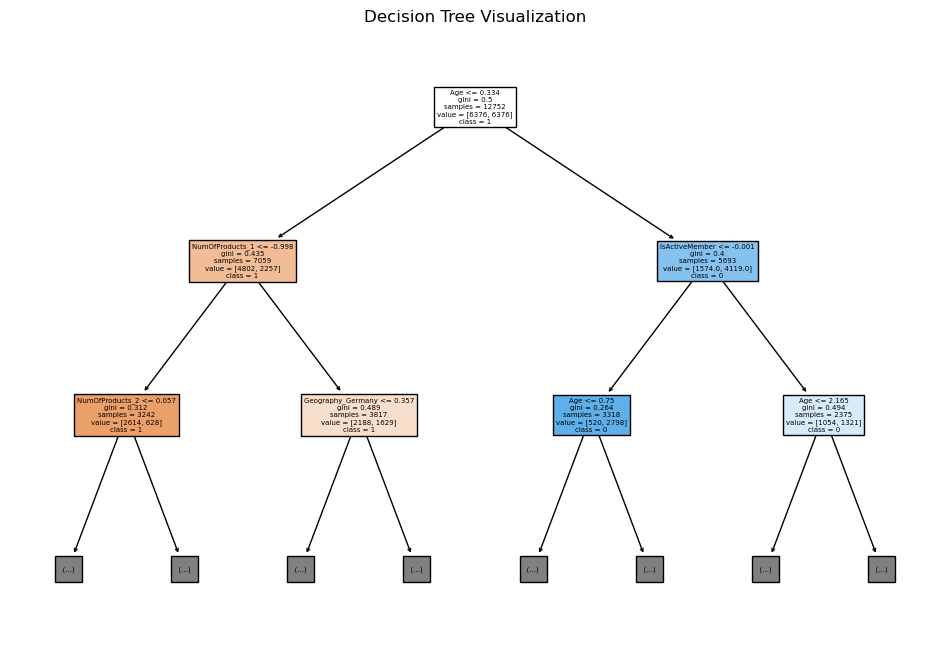

In [159]:
plt.figure(figsize=(12, 8))  
class_names = y.unique()
plot_tree(tree, feature_names=x.columns, class_names=[str(label) for label in class_names], filled=True,max_depth=2)
plt.title("Decision Tree Visualization")
plt.show()

# Decision Tree Interpretation.
 **Root Node**: 
- The **root node** has the highest impurity (Gini = 0.5), suggesting the data is initially evenly split across classes.
- **Age** is used to split the data first, but it alone does not perfectly separate the classes.
- **Left Branch**:
- The **Number of Products** feature helps reduce the Gini impurity at the left branch, indicating it is somewhat predictive of the target class.
- **Right Branch**:
- The **Active Member** feature helps improve class separation in the right branch, though the reduction in impurity is slightly stronger than the **Number of Products** split.
- Overall, the tree is working to improve the classification, through calculating the impurity for feaures and split based on the feature with least gini value.
- As seen from the tree plot the most important features are: Age,Number of Products, Is Active Member and the tree continue to split base on the features with less impurity


In [161]:
method=dict()
method['DecisionTree']={"Accuracy":round(accuracy_score(y_test,y_test_pred)*100,2),
                        "F1_score":round(f1_score(y_test,y_test_pred)*100,2),
                        "Recall":round(recall_score(y_test,y_test_pred)*100,2),
                        "Precision":round(precision_score(y_test,y_test_pred)*100,2)
                       }

# Naive Bayes

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_bayes = scaler.fit_transform(x_train)
x_test_bayes = scaler.fit_transform(x_test)
x_train_bayes

array([[1.        , 0.32432432, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.63513514, 0.7       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.28378378, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.40509378, 0.03410202, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.25521074, 0.30762703, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.52446452, 0.44525936, ..., 1.        , 0.        ,
        0.        ]])

In [164]:
# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(x_train_bayes, y_train)
mnb_predictions = mnb.predict(x_test_bayes)


In [165]:
compute_metrics(y_test,mnb_predictions)

Accuracy of the Model is => 71.24
F1 Score of the Model is => 72.38
Recall Score of the Model is => 75.36
Precision Score of the Model is => 69.62


In [166]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train_bayes, y_train)
gnb_predictions = gnb.predict(x_test_bayes)

# the classification report for the gaussian 
compute_metrics(y_test,gnb_predictions)

Accuracy of the Model is => 71.11
F1 Score of the Model is => 66.3
Recall Score of the Model is => 56.84
Precision Score of the Model is => 79.54


# Model Comparison for Customer Churn Classification

We evaluated two different Naive Bayes models, **Multinomial Naive Bayes** and **Gaussian Naive Bayes**, using the following metrics:

### Multinomial Naive Bayes:
- **Accuracy**: 71.24%
- **F1 Score**: 72.38%
- **Recall Score**: 69.62%
- **Precision Score**: 66.94%

### Gaussian Naive Bayes:
- **Accuracy**: 71.11%
- **F1 Score**: 66.3%
- **Recall Score**: 56.84%
- **Precision Score**: 79.54%

---

### Key Observations:
1. **Accuracy**:  
   The accuracy is quite close for both models, with **Multinomial Naive Bayes** (71.24%) slightly outperforming **Gaussian Naive Bayes** (71.11%).

2. **F1 Score**:  
   The **Multinomial Naive Bayes** model has a significantly higher F1 score (72.38%) compared to **Gaussian  Naive Bayes** (66.3%), indicating better balance between precision and recall.

3. **Recall Score**:  
   **Multinomial Naive Bayes** shows better recall (69.62%) than **Gaussian Naive Bayes** (56.84%), meaning it does a better job of identifying churned customers (minimizing false negatives).

4. **Precision Score**:  
   **Gaussian Naive Bayes** shows better recall (79.54%) than **Multinomial Naive Bayes** (66.94%), meaning it does a better job of predicting churned customers (minimizing false positives).

---

### Conclusion:
Based on higher F1 and recall scores, **Multinomial Naive Bayes** is the better model for classifying customer churn. It provides a more balanced performance and is more effective at identifying churners, making it a better choice for this task.


In [168]:
cm = confusion_matrix(y_test, mnb_predictions)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix for Multinomial Naive Bayes:")
print(cm_df)


Confusion Matrix for Multinomial Naive Bayes:
          Predicted 0  Predicted 1
Actual 0         1065          522
Actual 1          391         1196


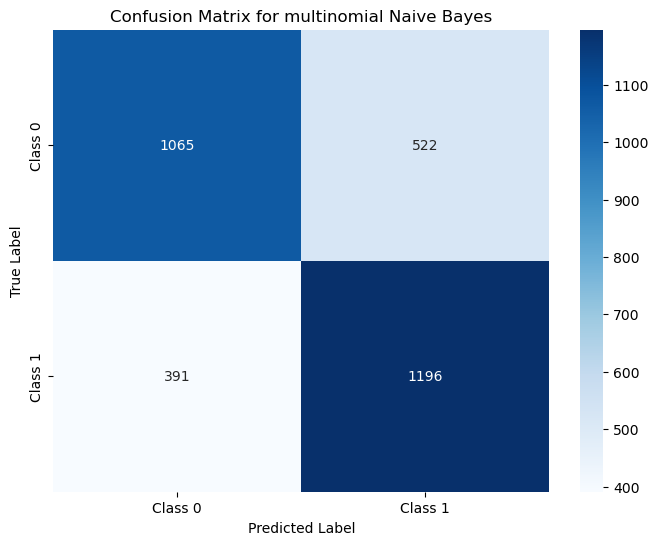

In [169]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for multinomial Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [170]:
#putting the report in a dict to visualize them 
mnb_report = classification_report(y_test, mnb_predictions, output_dict=True)
gnb_report = classification_report(y_test, gnb_predictions, output_dict=True)

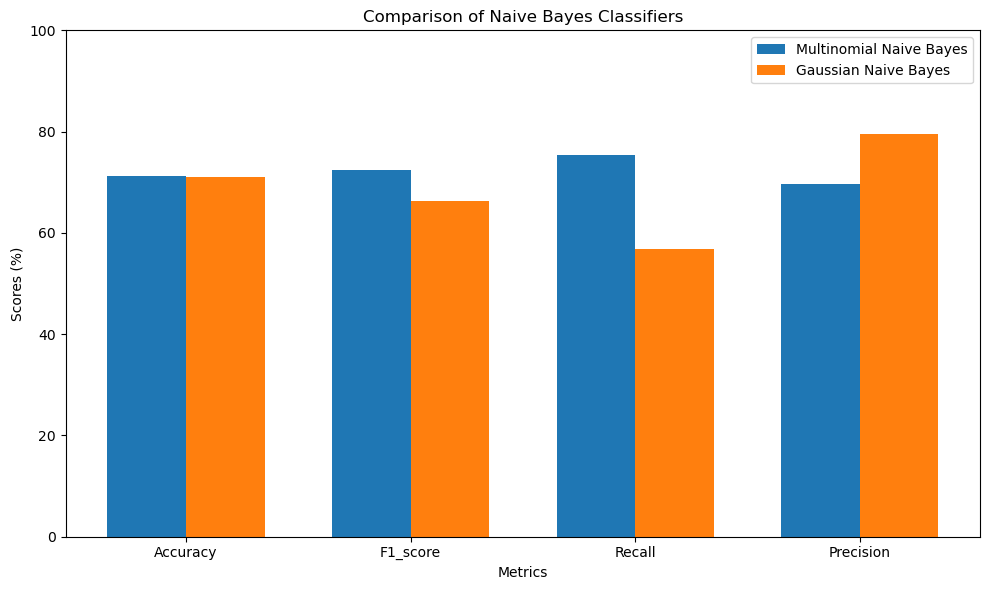

In [276]:
# # Extracting the metrics for plotting
metrics = list(method['MultinomialNaiveBayes'].keys())
mnb_scores = [method['MultinomialNaiveBayes'][metric] for metric in metrics]
gnb_scores = [method['GaussianNaiveBayes'][metric] for metric in metrics]

# # Set up the bar width and positions
bar_width = 0.35
x = np.arange(len(metrics))

# # Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, mnb_scores, width=bar_width, label='Multinomial Naive Bayes', color='#1f77b4')
plt.bar(x + bar_width/2, gnb_scores, width=bar_width, label='Gaussian Naive Bayes', color= '#ff7f0e')

# # Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores (%)')
plt.title('Comparison of Naive Bayes Classifiers')
plt.xticks(x, metrics)
plt.ylim(0, 100)
plt.legend()

# # Show the plot
plt.tight_layout()
plt.show()

# Using SelectKBest to see the most important features

# Why Choose SelectKBest for Naive Bayes

**SelectKBest** is ideal for Naive Bayes because it (based on statistical tests) so it is a better fit.

**Why Not RFE?**
**RFE** (Recursive Feature Elimination) is less suitable for Naive Bayes because it relies on model coefficients to rank features. Since Naive Bayes assumes feature independence and doesn’t use coefficients in the same way as other models like (desicion tree, Logistic Regression) 

### Conclusion:
**SelectKBest** is efficient, simple, and works well with Naive Bayes for feature selection.


In [173]:
# Print feature scores  according to the f-test 
from sklearn.feature_selection import SelectKBest, f_classif
# Select the top k features based on f-test
selector = SelectKBest(score_func=f_classif, k=6)  # here i first started with k=2 and when i tried k=6 it gave the best results

x_train_selected = selector.fit_transform(x_train_bayes, y_train)
x_test_selected = selector.transform(x_test_bayes)


In [174]:

feature_scores = selector.scores_
feature_names = x_train_frame.columns
selected_features = feature_names[selector.get_support()]
print("Feature Scores:")
for name, score in zip(feature_names, feature_scores):
    print(f"{name}: {score:.2f}")

print("\nSelected Features:", list(selected_features))

Feature Scores:
Gender: 240.41
Age: 1821.73
Tenure: 10.66
Balance: 379.87
HasCrCard: 1.61
IsActiveMember: 591.00
EstimatedSalary: 1.01
CreditScoreCategory: 27.95
Geography_France: 280.82
Geography_Germany: 584.71
Geography_Spain: 40.25
NumOfProducts_1: 975.08
NumOfProducts_2: 2219.56
NumOfProducts_3: 698.51

Selected Features: ['Age', 'IsActiveMember', 'Geography_Germany', 'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3']


In [175]:
# Create a DataFrame for feature scores
feature_scores_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores
}).sort_values(by='Score', ascending=False)


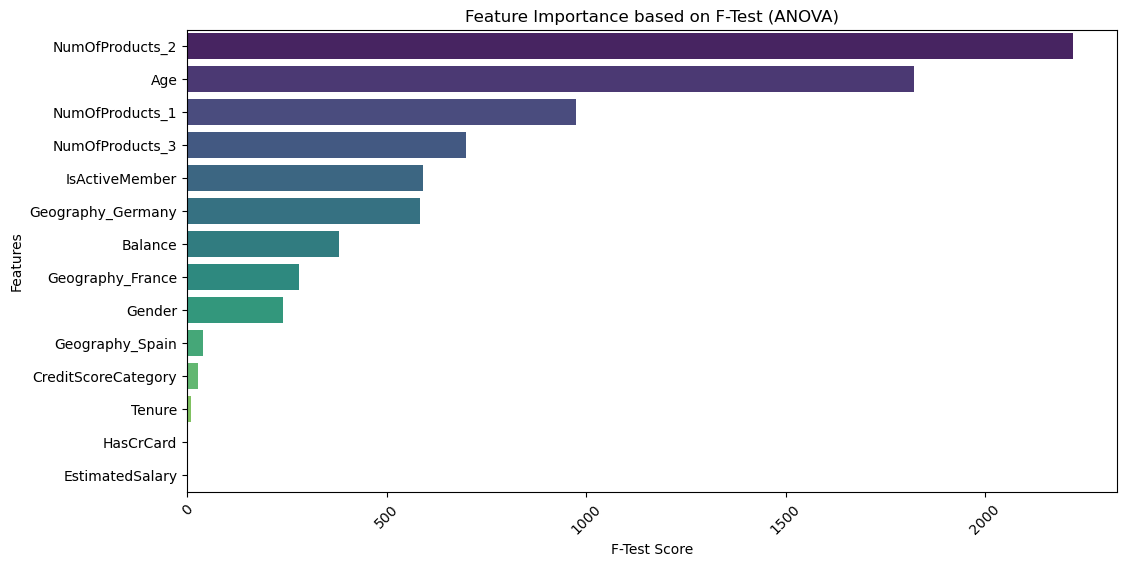

In [176]:


# Visualize the feature scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores_df, palette='viridis')
plt.title('Feature Importance based on F-Test (ANOVA)')
plt.xlabel('F-Test Score')
plt.ylabel('Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [177]:
# Multinomial Naive Bayes
new_mnb = MultinomialNB()
new_mnb.fit(x_train_selected, y_train)
new_mnb_predictions = new_mnb.predict(x_test_selected)

# the classification report for the gaussian 
new_mnb_scores= compute_metrics(y_test,new_mnb_predictions)
new_mnb_scores

Accuracy of the Model is => 72.72
F1 Score of the Model is => 74.12
Recall Score of the Model is => 78.13
Precision Score of the Model is => 70.49


In [178]:
# Gaussian Naive Bayes
new_gnb = GaussianNB()
new_gnb.fit(x_train_selected, y_train)
new_gnb_predictions = new_gnb.predict(x_test_selected)

# the classification report for the gaussian 
new_gnb_scores= compute_metrics(y_test,new_gnb_predictions)
new_gnb_scores

Accuracy of the Model is => 74.57
F1 Score of the Model is => 70.73
Recall Score of the Model is => 61.44
Precision Score of the Model is => 83.33


### Model Comparison Analysis

#### **Evaluation Metrics**

| Metric         | Multinomial | Gaussian |
|----------------|-------------|----------|
| **Accuracy**   | 72.72       | 74.57    |
| **F1 Score**   | 74.12       | 70.73    |
| **Recall**     | 78.13       | 61.44    |
| **Precision**  | 70.49       | 83.33    |

#### **Key Observations:**

1. **Accuracy:**
   - The Gaussian model has a slightly higher accuracy (**74.57 vs. 72.72**).

2. **F1 Score:**
   - The Multinomial model has a better F1 score (**74.12 vs. 70.73**).
   - F1 is crucial for imbalanced datasets as it balances precision and recall.

3. **Recall:**
   - The Multinomial model has a significantly higher recall (**78.13 vs. 61.44**).
   - Higher recall means the model is better at identifying positive cases.

4. **Precision:**
   - The Gaussian model has a much higher precision (**83.33 vs. 70.49**).
   - Higher precision means the model is better at avoiding false positives.

#### **Which Model is Better?**

- **Multinomial Model:**
  - Higher **recall (78.13%)** and **F1 score (74.12%)**.
  - Better suited for identifying customers who are likely to leave.

- **Gaussian Model:**
  - Higher **accuracy (74.57%)** and **precision (83.33%)**.
  - Better at avoiding false positives but less effective at capturing churners.



In a customer churn prediction scenario, **recall** is more important as the goal is to identify as many potential churners as possible to apply retention strategies. Missing a potential churner could lead to revenue loss.

**Conclusion:** The **Multinomial model** is the better choice for this task due to its higher recall and F1 score, which ensure a good balance between identifying churners and maintaining prediction reliability.


In [180]:
method['MultinomialNaiveBayes']={"Accuracy":round(accuracy_score(y_test,mnb_predictions)*100,2),
                        "F1_score":round(f1_score(y_test,mnb_predictions)*100,2),
                        "Recall":round(recall_score(y_test,mnb_predictions)*100,2),
                        "Precision":round(precision_score(y_test,mnb_predictions)*100,2)         }

In [181]:
method['GaussianNaiveBayes']={"Accuracy":round(accuracy_score(y_test,gnb_predictions)*100,2),
                        "F1_score":round(f1_score(y_test,gnb_predictions)*100,2),
                        "Recall":round(recall_score(y_test,gnb_predictions)*100,2),
                        "Precision":round(precision_score(y_test,gnb_predictions)*100,2)
                       }

In [182]:
new_cm = confusion_matrix(y_test, new_mnb_predictions)
new_cm_df = pd.DataFrame(new_cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix for Multinomial Naive Bayes:")
print(new_cm_df)


Confusion Matrix for Multinomial Naive Bayes:
          Predicted 0  Predicted 1
Actual 0         1068          519
Actual 1          347         1240


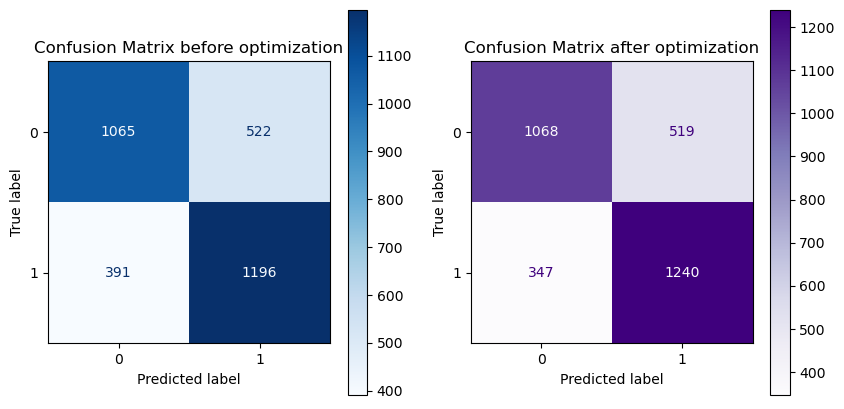

<Figure size 800x600 with 0 Axes>

In [183]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the 2 confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp2.plot(ax=axes[0], cmap=plt.cm.Blues, values_format='d')
axes[0].set_title('Confusion Matrix before optimization')


disp2 = ConfusionMatrixDisplay(confusion_matrix=new_cm, display_labels=[0, 1])
disp2.plot(ax=axes[1], cmap=plt.cm.Purples, values_format='d')
axes[1].set_title('Confusion Matrix after optimization')
plt.figure(figsize=(8, 6))

 #Show the plot
plt.tight_layout()
plt.show()

### Confusion Matrix Analysis Before and After Optimization

#### **Before Optimization**
- **True Positives (TP):** 1065 (correctly predicted as positive)
- **False Positives (FP):** 522 (incorrectly predicted as positive)
- **True Negatives (TN):** 1196 (correctly predicted as negative)
- **False Negatives (FN):** 391 (incorrectly predicted as negative)

#### **After Optimization**
- **True Positives (TP):** 1068 
- **False Positives (FP):** 519 
- **True Negatives (TN):** 1240 
- **False Negatives (FN):** 347 

#### **Key Improvements**
1. **True Positives:** Slight increase, better at predicting positive cases.
2. **False Positives:** Slight decrease, fewer negatives misclassified as positives.
3. **True Negatives:** Significant increase, better at predicting negative cases.
4. **False Negatives:** Significant decrease, improved identification of positive cases.

#### **Conclusion**
The optimization process enhanced the model's performance, leading to more accurate classification of both positive and negative cases.


In [185]:
# Predict probabilities on the test set
y_scores = new_mnb.predict_proba(x_test_selected)[:, 1]  # Probability of the positive class


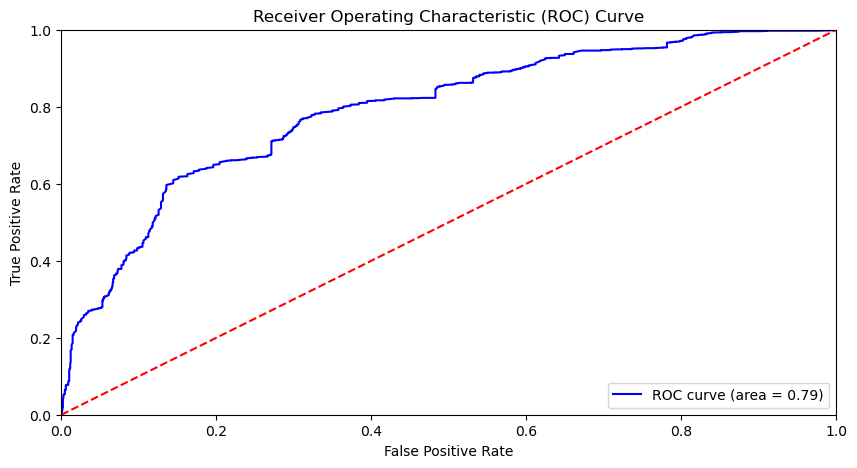

In [186]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # No Skill line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ROC Curve Insights

### Good Performance:
- The ROC curve is above the diagonal line, showing the model performs better than random guessing.

### Area Under the Curve (AUC):
- AUC = 0.79, indicating good classification performance. A higher AUC means better model accuracy.

### Threshold Selection:
- The curve shows that the model has a high True Positive Rate (TPR) with low False Positive Rate (FPR). This means the model effectively identifies positive cases and minimizes false alarms.

### Key Takeaways:
- The model has good classification performance (AUC = 0.79).
- It accurately identifies positive cases while controlling false positives.
- Performance can be improved by adjusting the threshold based on the desired trade-off between TPR and FPR.

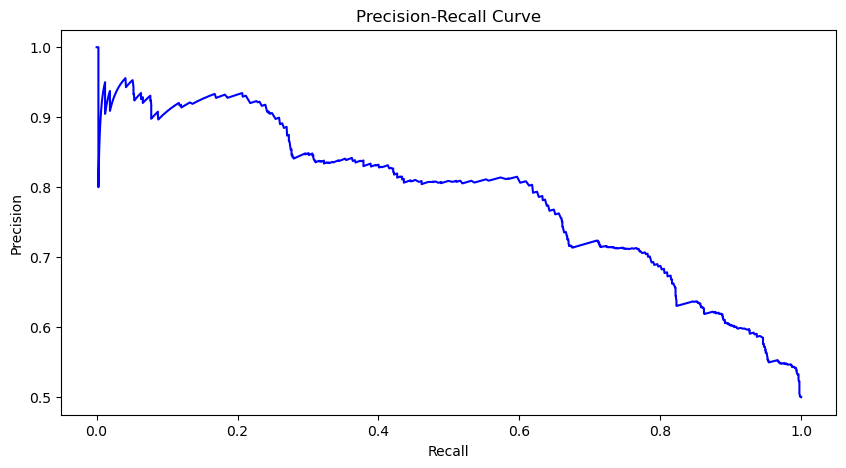

In [188]:
# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Precision-Recall Curve Insights

#### **Overall Trend**
- Precision decreases as recall increases, showing the trade-off between them.

#### **Key Observations**
1. Starts with high precision and low recall, good at identifying true positives but misses many.
2. Precision drops significantly around recall of 0.9, indicating more false positives.
3. Relatively stable precision between recall of 0.5 and 0.7, balancing precision and recall well.

#### **Conclusion**
The curve highlights the trade-off between capturing more true positives and avoiding false positives, with stable performance in a specific recall range.


<h1>SVM</h1>

In [191]:

def kernel(kind):
    # Printing the kernel type(linear) used in the model
    print(f"Kernel: {kind}")
    svm_model = SVC(kernel=kind, C=1, random_state=42)
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)
    
    # Calculating the accuracy of the model
    accuracy_linear = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy_linear:.4f}")
    
    # Generating and printing the confusion matrix
    conf_matrix_linear = confusion_matrix(y_test, y_pred)
   
    compute_metrics(y_test,y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - Kernel: {kind}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


Kernel: linear
Accuracy: 0.7457
Accuracy of the Model is => 74.57
F1 Score of the Model is => 76.78
Recall Score of the Model is => 84.06
Precision Score of the Model is => 70.66


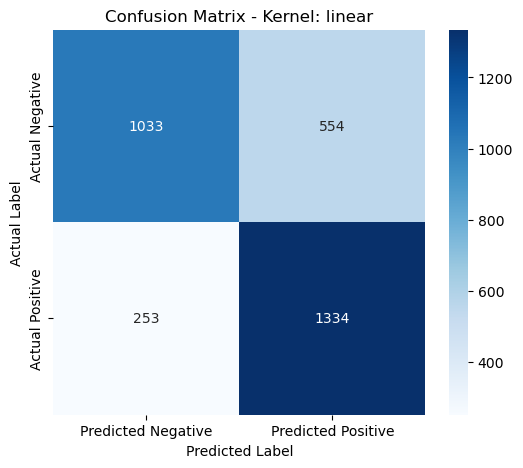

In [192]:
kernel('linear')

Kernel: poly
Accuracy: 0.6588
Accuracy of the Model is => 65.88
F1 Score of the Model is => 61.31
Recall Score of the Model is => 54.06
Precision Score of the Model is => 70.79


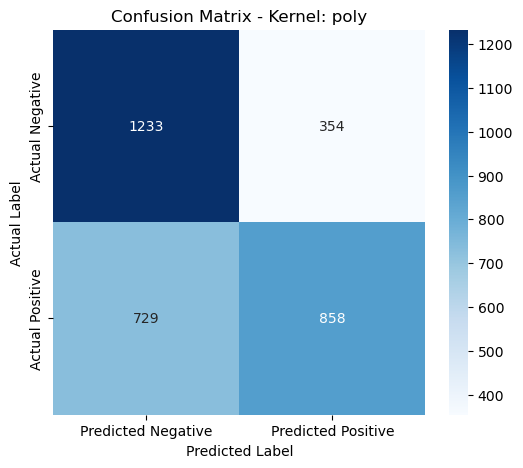

In [193]:
kernel('poly')

Kernel: rbf
Accuracy: 0.7539
Accuracy of the Model is => 75.39
F1 Score of the Model is => 73.94
Recall Score of the Model is => 69.82
Precision Score of the Model is => 78.58


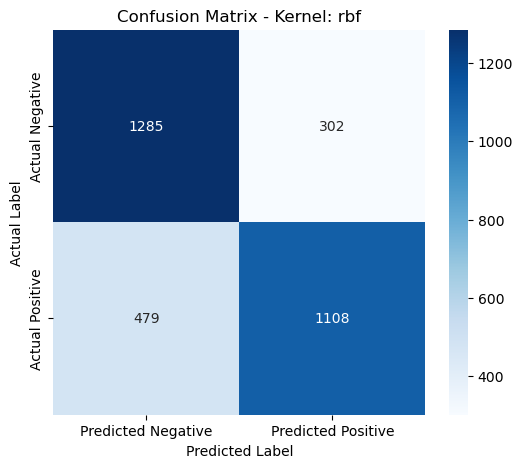

In [194]:
kernel("rbf")

# Insights from Model Evaluation (Imbalanced Data)

### 1. Key Observations (Focusing on F1 Score)
- **Linear Kernel** has the highest F1 Score (**76.75**), indicating a good balance between precision and recall.
- **RBF Kernel** follows with an F1 Score of **73.94**, offering a balanced performance.
- **Polynomial Kernel** has the lowest F1 Score (**61.31**), making it unsuitable for this task.

---

### 2. Handling Imbalanced Data
- F1 Score is prioritized as it balances precision and recall, which is crucial for imbalanced datasets.

---

### 3. Next Steps
- Focus on the **Linear** and **RBF** kernels.
- Tune the **C hyperparameter** to further improve the F1 Score.

In [196]:
# Define different kernels and C values
kernels = ['linear', 'rbf']
C_values = [0.1, 1, 10,100]

# Loop through each combination of kernel and C value
for kernel in kernels:
    for C in C_values:
        # Train the SVM model with the current kernel and C value
        svm_model = SVC(kernel=kernel, C=C, random_state=42)
        svm_model.fit(x_train, y_train)

        # Predictions
        y_pred = svm_model.predict(x_test)


        # Print only the 4 metrics
        print(f"Kernel: {kernel}, C: {C}")

        compute_metrics(y_test, y_pred)
        print("\n" + "="*50 + "\n")


Kernel: linear, C: 0.1
Accuracy of the Model is => 74.51
F1 Score of the Model is => 76.75
Recall Score of the Model is => 84.12
Precision Score of the Model is => 70.56


Kernel: linear, C: 1
Accuracy of the Model is => 74.57
F1 Score of the Model is => 76.78
Recall Score of the Model is => 84.06
Precision Score of the Model is => 70.66


Kernel: linear, C: 10
Accuracy of the Model is => 74.61
F1 Score of the Model is => 76.79
Recall Score of the Model is => 83.99
Precision Score of the Model is => 70.72


Kernel: linear, C: 100
Accuracy of the Model is => 74.61
F1 Score of the Model is => 76.79
Recall Score of the Model is => 83.99
Precision Score of the Model is => 70.72


Kernel: rbf, C: 0.1
Accuracy of the Model is => 78.51
F1 Score of the Model is => 79.03
Recall Score of the Model is => 80.97
Precision Score of the Model is => 77.18


Kernel: rbf, C: 1
Accuracy of the Model is => 75.39
F1 Score of the Model is => 73.94
Recall Score of the Model is => 69.82
Precision Score of the

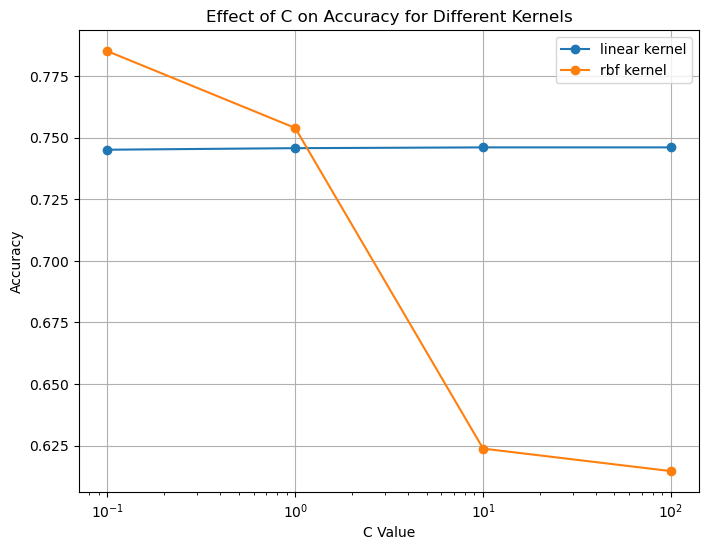

In [197]:
accuracies = {'linear': [], 'rbf': []}
C_values = [0.1, 1, 10, 100]

for kernel in accuracies.keys():
    for C in C_values:
        svm_model = SVC(kernel=kernel, C=C, random_state=42)
        svm_model.fit(x_train, y_train)
        y_pred = svm_model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies[kernel].append(acc)


plt.figure(figsize=(8, 6))
for kernel, acc in accuracies.items():
    plt.plot(C_values, acc, label=f'{kernel} kernel', marker='o')

plt.xscale('log')  
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Effect of C on Accuracy for Different Kernels')
plt.legend()
plt.grid(True)
plt.show()


# Insights from Model Evaluation with Different C Values

### 1. Key Observations (Linear Kernel)
- The performance of the **Linear Kernel** is consistent across different values of **C**:
  - **C = 0.1**: F1 Score = **76.75**, Recall = **84.12**, Precision = **70.56**.
  - **C = 1**: F1 Score = **76.75**, Recall = **84.06**, Precision = **70.62**.
  - **C = 10 and 100**: F1 Score = **76.79**, Recall = **83.99**, Precision = **70.72**.
- Slight improvement in precision with higher **C**, but overall changes are negligible.

**Insight:** The **Linear Kernel** is not significantly affected by the value of **C**, and it performs well with balanced F1 Scores and Recall.

---

### 2. Key Observations (RBF Kernel)
- The performance of the **RBF Kernel** varies significantly with **C**:
  - **C = 0.1**: Best performance with F1 Score = **79.03**, Recall = **80.97**, Precision = **77.18**.
  - **C = 1**: Balanced performance with F1 Score = **73.94**, Recall = **69.82**, Precision = **78.58**.
  - **C = 10 and 100**: Significant drop in F1 Score (**52.01** and **51.64** respectively), with Recall dropping below **42%**.

**Insight:** The **RBF Kernel** performs best with a smaller **C** value (**0.1**) but suffers from overfitting or underfitting with higher **C**.

---

### 3. Next Steps: Tuning Gamma for RBF Kernel
- The results suggest that the **RBF Kernel** has potential, especially with **C = 0.1**. 
- To further optimize the **RBF Kernel**, the next step is to perform a **Grid Search** over a range of **gamma** values.


In [199]:
# Define the model
svm_model = SVC()

# Define the parameter grid (C and gamma values)
param_grid = {
    'C': [0.1],
    'gamma': [.25,10,100]
}
# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the model with GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict on the test set
y_pred = grid_search.best_estimator_.predict(x_test)

compute_metrics(y_test,y_pred)

Best parameters found:  {'C': 0.1, 'gamma': 0.25}
Accuracy of the Model is => 78.64
F1 Score of the Model is => 79.1
Recall Score of the Model is => 80.84
Precision Score of the Model is => 77.43


# Insights from Optimized RBF Kernel with Grid Search

### 1. Key Observations
- **Best Parameters Found:** 
  - `C = 0.1` (small regularization parameter prevents overfitting).
  - `gamma = 0.25` (well-balanced value to control the influence of individual data points).
  
- **Performance Metrics:**
  - **Accuracy:** 78.64% - High overall classification accuracy.
  - **F1 Score:** 79.1 - Indicates a strong balance between precision and recall.
  - **Recall:** 80.84 - High recall means the model successfully identifies most of the true positives.
  - **Precision:** 77.43 - Slightly lower precision, suggesting a few false positives, but still acceptable.

---

### 2. Comparison to Previous Results
- **Improvement Over Default RBF Parameters:** 
  - F1 Score increased from **79.03** (best default with `C=0.1`) to **79.1**, showing better optimization with `gamma=0.25`.
  - Recall increased slightly from **80.97** to **80.84**, while Precision remained close to **77.18**.

- **Comparison with Linear Kernel:**
  - The RBF Kernel now outperforms the Linear Kernel in both **F1 Score** and **Precision**.

---

### 3. Insights
- The **RBF Kernel** with `C = 0.1` and `gamma = 0.25` provides the best trade-off between complexity and performance for this dataset.
- The higher **Recall** makes this model ideal for scenarios where identifying true positives is critical, such as in imbalanced datasets.


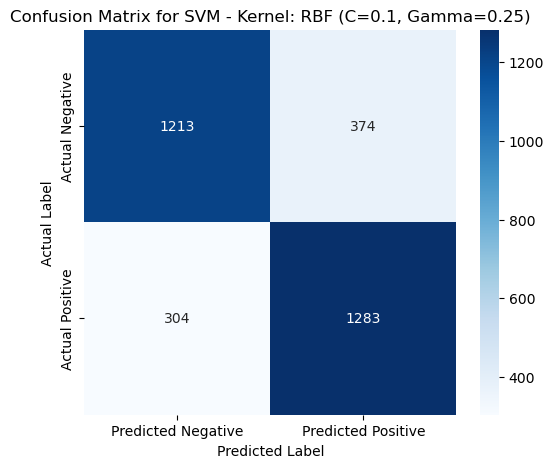

In [201]:
# Train the SVM model
svm_model = SVC(C=0.1, gamma=0.25, kernel='rbf')  # Use the best parameters from Grid Search
svm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)

# Plot the confusion matrix using sns.heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for SVM - Kernel: RBF (C=0.1, Gamma=0.25)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [202]:
method['SVM']={"Accuracy":round(accuracy_score(y_test,y_pred)*100,2),
               "F1_score":round(f1_score(y_test,y_pred)*100,2),
               "Recall":round(recall_score(y_test,y_pred)*100,2),
               "Precision":round(precision_score(y_test,y_pred)*100,2)
              }

# SVM Model Comparison: Before and After Optimization

## Metrics Comparison:

| Metric         | Before Optimization | After Optimization |
|----------------|---------------------|--------------------|
| **Accuracy**   | 75.39%              | 78.64%             |
| **F1 Score**   | 73.94               | 79.10              |
| **Recall**     | 69.82               | 80.84              |
| **Precision**  | 78.58               | 77.43              |

---

## Confusion Matrix:

### Before Optimization (rbf):
|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| **Actual 0**  |1285         | 302         |
| **Actual 1**  | 497         | 1108        |

- **True Negatives (TN)**: 1285 — The model correctly predicted 1285 instances of Actual 0 as Predicted 0.
- **False Positives (FP)**: 302 — The model incorrectly predicted 302 instances of Actual 0 as Predicted 1.
- **False Negatives (FN)**: 497 — The model incorrectly predicted 497 instances of Actual 1 as Predicted 0.
- **True Positives (TP)**: 1108 — The model correctly predicted 1108 instances of Actual 1 as Predicted 1.

---

### After Optimization (Best Parameters: C=0.1, Gamma=0.25):
|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| **Actual 0**  | 1213        | 374         |
| **Actual 1**  | 304         | 1283        |

- **True Negatives (TN)**: 1213 — The optimized model correctly predicted 1213 instances of Actual 0 as Predicted 0, a slight decrease compared to the previous model.
- **False Positives (FP)**: 374 — The false positives increased to 374, indicating more instances of Actual 0 incorrectly classified as Predicted 1.
- **False Negatives (FN)**: 304 — The false negatives decreased significantly to 304, showing an improvement in detecting Actual 1 instances.
- **True Positives (TP)**: 1283 — True positives increased to 1283, meaning the optimized model is better at detecting Actual 1 instances.

### Key Insights:
- The **true negatives** decreased slightly, while **true positives** increased, which indicates a better detection of Actual 1 instances.
- The **false negatives** decreased significantly, which is a key improvement, indicating the model is better at identifying Actual 1 cases (reducing missed positive cases).
- However, the **false positives** increased slightly, meaning the model is making more incorrect positive predictions for Actual 0 cases, though the overall improvement in recall and true positives outweighs this increase.



<h1>KNN</h1>

In [205]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np



### Finding the best paramters for KNN

In [258]:
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']
best_k = None
best_metric = None
best_f1_score = 0

k_values = [5,6,7,8,9,10,11,12,13,14,15,17]
for k in k_values:
    for metric in distance_metrics:
        # Build the KNN Model
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(x_train, y_train)
        
        # Predict on test set 
        y_pred = knn.predict(x_test)
        
        # Calculate F1_Score
        f1 = f1_score(y_test, y_pred, average='weighted')  
        print(f"k={k}, metric={metric}, F1 Score={f1:.4f}")
        
        # Best F1_Score
        if f1 > best_f1_score:
            best_f1_score = f1
            best_k = k
            best_metric = metric

print(f"\nBest k: {best_k}, Best distance metric: {best_metric}, Best F1 Score: {best_f1_score:.4f}")


k=1, metric=euclidean, F1 Score=0.6871
k=1, metric=manhattan, F1 Score=0.6919
k=1, metric=chebyshev, F1 Score=0.5692
k=1, metric=minkowski, F1 Score=0.6871
k=1, metric=cosine, F1 Score=0.7075
k=2, metric=euclidean, F1 Score=0.6670
k=2, metric=manhattan, F1 Score=0.6705
k=2, metric=chebyshev, F1 Score=0.5304
k=2, metric=minkowski, F1 Score=0.6670
k=2, metric=cosine, F1 Score=0.6925
k=3, metric=euclidean, F1 Score=0.7024
k=3, metric=manhattan, F1 Score=0.7085
k=3, metric=chebyshev, F1 Score=0.5730
k=3, metric=minkowski, F1 Score=0.7024
k=3, metric=cosine, F1 Score=0.7145
k=4, metric=euclidean, F1 Score=0.6981
k=4, metric=manhattan, F1 Score=0.6951
k=4, metric=chebyshev, F1 Score=0.5644
k=4, metric=minkowski, F1 Score=0.6981
k=4, metric=cosine, F1 Score=0.7091
k=5, metric=euclidean, F1 Score=0.7192
k=5, metric=manhattan, F1 Score=0.7214
k=5, metric=chebyshev, F1 Score=0.5805
k=5, metric=minkowski, F1 Score=0.7192
k=5, metric=cosine, F1 Score=0.7313
k=6, metric=euclidean, F1 Score=0.7216
k

### Experimenting with Different Distance Metrics

The best distance metric for accuracy is: cosine
The highest accuracy is: 0.7577
The best distance metric for precision is: cosine
The highest precision is: 0.7578
The best distance metric for recall is: cosine
The highest recall is: 0.7577
The best distance metric for F1-score is: cosine
The highest F1-score is: 0.7577


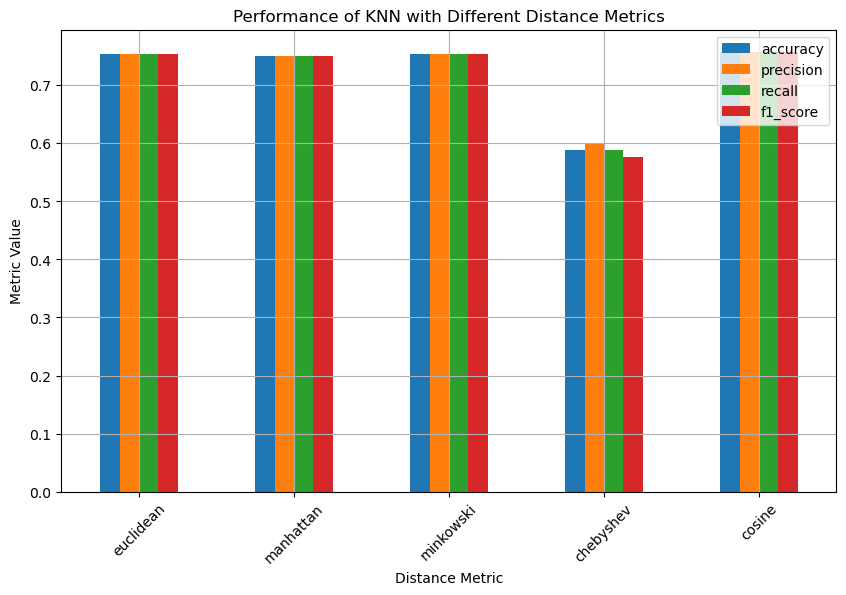

In [260]:
metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'cosine']
metric_results = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors= best_k, metric=metric)  
    knn.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(x_test)
    
    # Evaluate using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    metric_results[metric] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

# Convert the results into a DataFrame for better visualization
metric_results_df = pd.DataFrame(metric_results).T

# Find the metrics with the highest values
best_accuracy_metric = metric_results_df['accuracy'].idxmax()
best_accuracy = metric_results_df.loc[best_accuracy_metric, 'accuracy']

best_precision_metric = metric_results_df['precision'].idxmax()
best_precision = metric_results_df.loc[best_precision_metric, 'precision']

best_recall_metric = metric_results_df['recall'].idxmax()
best_recall = metric_results_df.loc[best_recall_metric, 'recall']

best_f1_metric = metric_results_df['f1_score'].idxmax()
best_f1 = metric_results_df.loc[best_f1_metric, 'f1_score']

# Print the best metrics for each calculation
print(f"The best distance metric for accuracy is: {best_accuracy_metric}")
print(f"The highest accuracy is: {best_accuracy:.4f}")

print(f"The best distance metric for precision is: {best_precision_metric}")
print(f"The highest precision is: {best_precision:.4f}")

print(f"The best distance metric for recall is: {best_recall_metric}")
print(f"The highest recall is: {best_recall:.4f}")

print(f"The best distance metric for F1-score is: {best_f1_metric}")
print(f"The highest F1-score is: {best_f1:.4f}")

# Plot the results
metric_results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance of KNN with Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Impact of KNN Distance Metrics on F1-Score

- **Euclidean, Manhattan, and Minkowski Metrics:**  
  These distance metrics performed similarly, indicating that for this dataset, the specific choice of these metrics does not significantly affect the KNN model's performance. The results suggest that the relative distance between points in the feature space plays a comparable role in all three metrics.

- **Chebyshev Metric:**  
  The Chebyshev distance, which focuses on the maximum difference in a single dimension, resulted in lower performance. This suggests that, in this case, relying on the maximum difference in one dimension is not as effective for distinguishing between classes compared to the other distance metrics.

- **Cosine Metric:**  
  The Cosine distance metric performed slightly better, especially in terms of **F1-score**. This indicates that, for this dataset, the direction (angle) between vectors plays a more significant role in classification than their magnitudes. It implies that the alignment of features relative to each other is more important than their absolute distances.
 .



## Build the Final KNN model

In [262]:
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
best_knn.fit(x_train, y_train)


KNeighborsClassifier(metric='cosine', n_neighbors=17)

### Model Evaluation

In [264]:
# Assuming `best_knn` is your best KNN model from previous code
y_pred = best_knn.predict(x_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_best = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy on test set: {accuracy:.4f}")
print(f"Precision on test set: {precision:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"F1 Score on test set with best model: {f1_best:.4f}")


Accuracy on test set: 0.7577
Precision on test set: 0.7578
Recall on test set: 0.7577
F1 Score on test set with best model: 0.7577


### Confusion Matrix

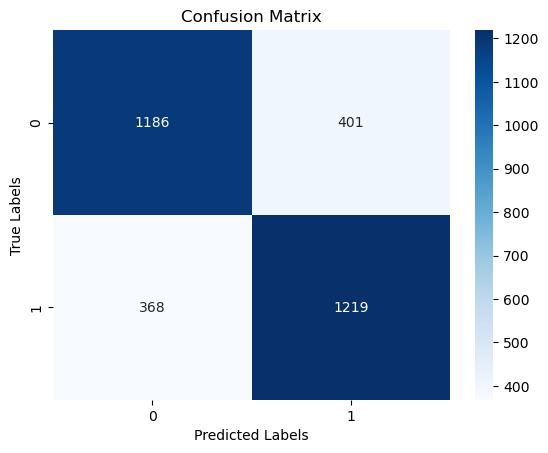

In [266]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Interpreting the Values

#### Confusion Matrix Breakdown:
- **True Positives (TP)**: The top-left cell (**1244**) represents the number of instances where the true label was `0`, and the model correctly predicted `0`.
- **True Negatives (TN)**: The bottom-right cell (**1136**) represents the number of instances where the true label was `1`, and the model correctly predicted `1`.
- **False Positives (FP)**: The top-right cell (**343**) represents the number of instances where the true label was `0`, but the model incorrectly predicted `1`. These are also known as **Type I errors**.
- **False Negatives (FN)**: The bottom-left cell (**451**) represents the number of instances where the true label was `1`, but the model incorrectly predicted `0`. These are also known as **Type II errors**.

---

### Analysis

1. **Overall Accuracy**:
   - The model performs reasonably well overall.
   - Correct predictions (TP + TN): \( 1244 + 1136 = 2380 \)
   - Incorrect predictions (FP + FN): \( 343 + 451 = 794 \)

2. **Class Distribution**:
   - Class 0: \( 1244 + 343 = 1587 \)
   - Class 1: \( 451 + 1136 = 1587 \)
   - The dataset appears balanced between the two classes, with both having **1587 instances**, which avoids major class imbalance concerns.




### Cross-Validation

In [268]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_knn, x_train, y_train, cv=5, scoring='f1_weighted')
print(f"Cross-validated F1 scores: {scores}")
print(f"Mean F1 score from cross-validation: {scores.mean():.4f}")


Cross-validated F1 scores: [0.79314238 0.80814454 0.81682333 0.82155047 0.82557921]
Mean F1 score from cross-validation: 0.8130


In [270]:
method["KNN"] = {
    "Accuracy": round(accuracy_score(y_test, y_pred) * 100, 2),  # No 'average' parameter for accuracy
    "F1_score": round(f1_score(y_test, y_pred, average='weighted') * 100, 2),
    "Recall": round(recall_score(y_test, y_pred, average='weighted') * 100, 2),
    "Precision": round(precision_score(y_test, y_pred, average='weighted') * 100, 2),
}


<h1>Compare Between Different Models</h1>

In [272]:
df = pd.DataFrame(method).T
df

,Accuracy,F1_score,Recall,Precision
DecisionTree,79.62,80.45,83.87,77.29
MultinomialNaiveBayes,71.24,72.38,75.36,69.62
GaussianNaiveBayes,71.11,66.30,56.84,79.54
SVM,78.64,79.10,80.84,77.43
KNN,75.77,75.77,75.77,75.78


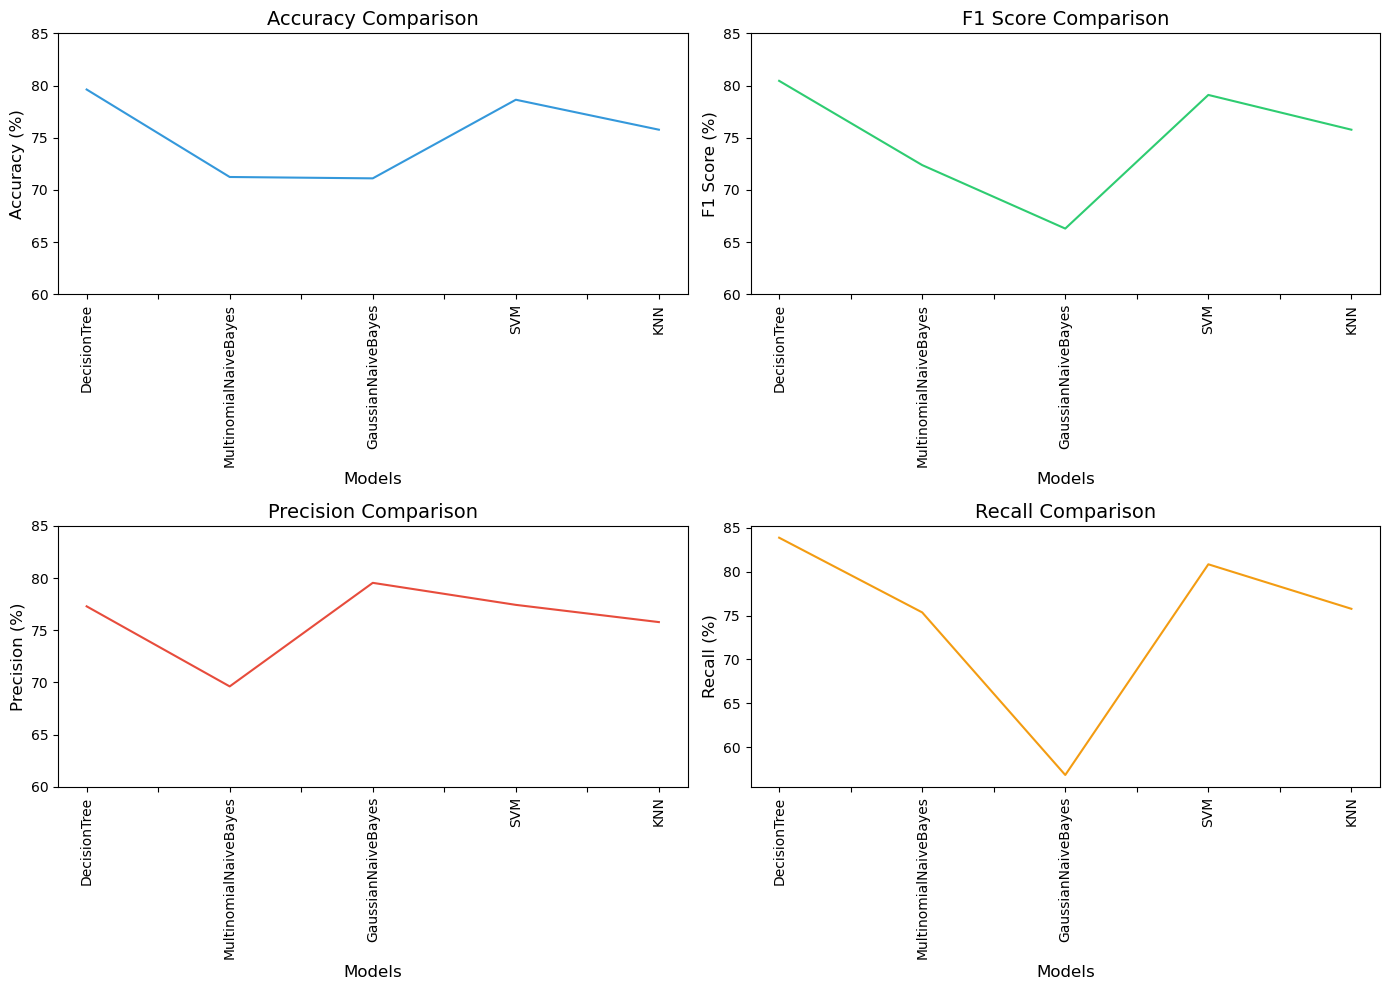

In [274]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Accuracy
df['Accuracy'].plot(kind='line', ax=axes[0, 0], color='#3498db', legend=False)
axes[0, 0].set_title('Accuracy Comparison', fontsize=14)
axes[0, 0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0, 0].set_xlabel('Models', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 0].set_yticks([60, 65, 70, 75, 80, 85])

# Plot for F1 Score
df['F1_score'].plot(kind='line', ax=axes[0, 1], color='#2ecc71', legend=False)
axes[0, 1].set_title('F1 Score Comparison', fontsize=14)
axes[0, 1].set_ylabel('F1 Score (%)', fontsize=12)
axes[0, 1].set_xlabel('Models', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].set_yticks([60, 65, 70, 75, 80, 85])

# Plot for Precision
df['Precision'].plot(kind='line', ax=axes[1, 0], color='#e74c3c', legend=False)
axes[1, 0].set_title('Precision Comparison', fontsize=14)
axes[1, 0].set_ylabel('Precision (%)', fontsize=12)
axes[1, 0].set_xlabel('Models', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].set_yticks([60, 65, 70, 75, 80, 85])

# Plot for Recall
df['Recall'].plot(kind='line', ax=axes[1, 1], color='#f39c12', legend=False)
axes[1, 1].set_title('Recall Comparison', fontsize=14)
axes[1, 1].set_ylabel('Recall (%)', fontsize=12)
axes[1, 1].set_xlabel('Models', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].set_yticks([60, 65, 70, 75, 80, 85])

# Layout adjustments
plt.tight_layout()
plt.show()

## KNN

KNN is very suitable for this data because it performs well for smaller datasets with distinct patterns. It had some challenges, such as dealing with imbalanced data, noise in the Age column, and non-scaled data, but all of these problems have been solved.

It is straightforward and requires no complex parameter tuning, so there’s no need to apply algorithms like grid search, which has very high complexity.

KNN works well even if the churn data has non-linear relationships. It was observed that the linear correlation is weak, which indicates that the relationship is non-linear.

KNN can provide insights into churn prediction by showing which customers are similar in behavior.

## Naive Bayes

Naive Bayes assumes that all features are conditionally independent given the class label, which doesn’t apply to our data, as the number of products depends on whether the customer is active, along with many other relationships. In this case, every feature is built on top of another, so the dependency is clearly observed, leading to lower accuracy.

## Decision Tree

Decision trees are efficient for churn datasets. While they often achieve good accuracy across features, their performance may vary depending on data quality and feature engineering. However, because decision trees evaluate multiple parameters during the splitting process, their computational complexity can be slightly higher.

## SVM

SVM is an effective method but is very complex, especially when using grid search to optimize parameters. It has the diversity to classify both linear and non-linear data, which is helpful in this case, as the best kernel type was found to be RBF, confirming that our pared to its simplicity.



## Conclusion

<b>The best model to use in this dataset is KNN</b>. Although it ranks third across the models, its accuracy and F1 score are acceptable compared to its simplicity.